In [1]:
myvars = {}
with open("gboppana-sql-pass") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

In [2]:
myvars.keys()

dict_keys(['DB username', 'DB databasename', 'DB password'])

In [3]:
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501saptpurkSpring23grp_02_db')
cursor = conn.cursor()

In [4]:
import pandas as pd
cursor.execute('SELECT Age, DateOfBirth, Sex, MaritalStatus, EducationLevel, Occupation, RegimenAtStart, WeightAtStart, Cd4AtStart, ClinicalStageAtLastVisit, TbStatusAtLAstVisit, ArvAdherenceLatestLevel, WeightAtLastVisit, OpportunisticInfectionPresentAtLastVisit, AnySideEffects, MostRecentCd4Count, ViralLoad FROM HIV')
rows = cursor.fetchall()
df = pd.read_sql('SELECT Age, DateOfBirth, Sex, MaritalStatus, EducationLevel, Occupation, RegimenAtStart, WeightAtStart, Cd4AtStart, ClinicalStageAtLastVisit, TbStatusAtLAstVisit, ArvAdherenceLatestLevel, WeightAtLastVisit, OpportunisticInfectionPresentAtLastVisit, AnySideEffects, MostRecentCd4Count, ViralLoad FROM HIV', conn)

/tmp/ipykernel_3866883/2618413404.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT Age, DateOfBirth, Sex, MaritalStatus, EducationLevel, Occupation, RegimenAtStart, WeightAtStart, Cd4AtStart, ClinicalStageAtLastVisit, TbStatusAtLAstVisit, ArvAdherenceLatestLevel, WeightAtLastVisit, OpportunisticInfectionPresentAtLastVisit, AnySideEffects, MostRecentCd4Count, ViralLoad FROM HIV', conn)


In [5]:
df

,Age,DateOfBirth,Sex,MaritalStatus,EducationLevel,Occupation,RegimenAtStart,WeightAtStart,Cd4AtStart,ClinicalStageAtLastVisit,TbStatusAtLAstVisit,ArvAdherenceLatestLevel,WeightAtLastVisit,OpportunisticInfectionPresentAtLastVisit,AnySideEffects,MostRecentCd4Count,ViralLoad
0,18.0,28/11/2000,Female,Single,Tertiary,Student,TDF-3TC-EFV,54,None,I,No sign,Good,59,No,No,None,None
1,28.0,5/6/1986,Female,Married,Primary,Unemployed,TDF-3TC-EFV,40,None,II,No sign,Good,50,No,No,None,20
2,50.0,12/4/1955,Male,Married,Primary,Civil servant,AZT-3TC-NVP,78,20,II,No sign,Good,85,No,No,416,<20
3,51.0,15/4/1963,Female,Married,Missing,Self employed,TDF-3TC-EFV,41,58,I,No sign,Good,47,No,No,185,9031co/ml
4,30.0,12/3/1985,Female,Single,Secondary,Self employed,TDF-3TC-EFV,58,394,I,No sign,Good,70,No,No,657,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27283,32.0,5/4/1987,Male,Married,Tertiary,Civil servant,TDF-3TC-EFV,56,35,I,No sign,Good,67,No,No,454,20
27284,27.0,15/6/1986,Female,Single,Missing,Business person,TDF-3TC-EFV,32,158,I,No sign,Good,45,No,No,None,None
27285,35.0,17/7/1982,Female,Married,Tertiary,Unemployed,TDF-3TC-EFV,55,301,I,No sign,Good,60,No,No,463,None
27286,25.0,7/7/1990,Female,Single,Secondary,Student,TDF-3TC-EFV,52,65,II,No sign,Good,55,No,No,None,None


In [6]:
import datetime

def calculate_age(birthdate):
    if birthdate is None or birthdate == 'Not written':
        return None # or you can return any other value you prefer for missing values
    try:
        birthdate = datetime.datetime.strptime(birthdate, "%d/%m/%Y")
        today = datetime.date.today()
        age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
        return age
    except ValueError:
        return None # or you can return any other value you prefer for invalid values
df['Age'] = df['DateOfBirth'].apply(calculate_age)


In [7]:
print(df['DateOfBirth'].unique())

['28/11/2000' '5/6/1986' '12/4/1955' ... '3/6/1953' '19/9/1986'
 '5/11/1983']


In [8]:
# drop the 'gender' column
df = df.drop('DateOfBirth', axis=1)

# print the updated DataFrame
#print(df)

In [9]:
df.isnull().sum()

Age                                          2827
Sex                                             0
MaritalStatus                                1741
EducationLevel                               2650
Occupation                                   2678
RegimenAtStart                                666
WeightAtStart                                2223
Cd4AtStart                                   5382
ClinicalStageAtLastVisit                        0
TbStatusAtLAstVisit                          1926
ArvAdherenceLatestLevel                      1297
WeightAtLastVisit                            2844
OpportunisticInfectionPresentAtLastVisit        0
AnySideEffects                               1190
MostRecentCd4Count                           7182
ViralLoad                                   13525
dtype: int64

In [10]:
df['Age'].max()

123.0

In [11]:
df.isnull().sum()

Age                                          2827
Sex                                             0
MaritalStatus                                1741
EducationLevel                               2650
Occupation                                   2678
RegimenAtStart                                666
WeightAtStart                                2223
Cd4AtStart                                   5382
ClinicalStageAtLastVisit                        0
TbStatusAtLAstVisit                          1926
ArvAdherenceLatestLevel                      1297
WeightAtLastVisit                            2844
OpportunisticInfectionPresentAtLastVisit        0
AnySideEffects                               1190
MostRecentCd4Count                           7182
ViralLoad                                   13525
dtype: int64

In [12]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce') # coerce errors to NaN
mean_age = df['Age'].mean()
rounded_mean_age = int(round(mean_age))
df['Age'].fillna(rounded_mean_age, inplace=True) # fill NaN with rounded mean of non-NaN values
df['Age'] = df['Age'].astype(int)

In [13]:
# Convert the 'Cd4AtStart' column to numeric
df['Cd4AtStart'] = pd.to_numeric(df['Cd4AtStart'], errors='coerce')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd


# Select the column with missing values
column = df['Cd4AtStart']

# Create the imputer object
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer on the column
imputer.fit(column.values.reshape(-1, 1))

# Transform the column with imputed values
column_imputed = pd.DataFrame(imputer.transform(column.values.reshape(-1, 1)))

# Replace the missing values in the original DataFrame with the imputed values
df['Cd4AtStart'] = column_imputed.values

# Print the number of missing values before and after imputation
print('Missing values before imputation:', column.isnull().sum())
print('Missing values after imputation:', df['Cd4AtStart'].isnull().sum())

Missing values before imputation: 5382
Missing values after imputation: 0


In [14]:
df['WeightAtStart'] = pd.to_numeric(df['WeightAtStart'], errors='coerce') # coerce errors to NaN
mean_WeightAtStart = df['WeightAtStart'].mean()
rounded_mean_WeightAtStart = int(round(mean_WeightAtStart))
df['WeightAtStart'].fillna(rounded_mean_WeightAtStart, inplace=True)

In [15]:
df['WeightAtLastVisit'] = pd.to_numeric(df['WeightAtLastVisit'], errors='coerce') # coerce errors to NaN
mean_WeightAtLastVisit = df['WeightAtLastVisit'].mean()
rounded_mean_WeightAtLastVisit = int(round(mean_WeightAtLastVisit))
df['WeightAtLastVisit'].fillna(rounded_mean_WeightAtLastVisit , inplace=True)

In [16]:
df['MostRecentCd4Count'] = pd.to_numeric(df['MostRecentCd4Count'], errors='coerce')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd


# Select the column with missing values
column = df['MostRecentCd4Count']

# Create the imputer object
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer on the column
imputer.fit(column.values.reshape(-1, 1))

# Transform the column with imputed values
column_imputed = pd.DataFrame(imputer.transform(column.values.reshape(-1, 1)))

# Replace the missing values in the original DataFrame with the imputed values
df['MostRecentCd4Count'] = column_imputed.values

# Print the number of missing values before and after imputation
print('Missing values before imputation:', column.isnull().sum())
print('Missing values after imputation:', df['MostRecentCd4Count'].isnull().sum())

Missing values before imputation: 7182
Missing values after imputation: 0


In [17]:
import pandas as pd
import re

# Define a regular expression pattern to extract numbers
pattern = r'(\d+\.?\d*)'

# Convert the 'ViralLoad' column to string data type
df['ViralLoad'] = df['ViralLoad'].astype(str)

# Apply the pattern to the 'ViralLoad' column and extract only the matched values
df['ViralLoad'] = df['ViralLoad'].str.extract(pattern)

# Convert the 'ViralLoad' column to a float data type
df['ViralLoad'] = df['ViralLoad'].astype(float)

In [18]:
import re
# Create a regular expression pattern to remove any non-alphanumeric and non-whitespace characters
pattern = re.compile(r'[^a-zA-Z0-9\s]+')

# Convert the 'MaritalStatus' column to string type
df['Sex'] = df['Sex'].astype(str)

# Apply the regular expression pattern to the 'MaritalStatus' column
df['Sex'] = df['Sex'].apply(lambda x: pattern.sub('', x))

# View the unique values in the cleaned 'MaritalStatus' column
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
import re
# Create a regular expression pattern to remove any non-alphanumeric and non-whitespace characters
pattern = re.compile(r'[^a-zA-Z0-9\s]+')

# Convert the 'MaritalStatus' column to string type
df['MaritalStatus'] = df['MaritalStatus'].astype(str)

# Apply the regular expression pattern to the 'MaritalStatus' column
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: pattern.sub('', x))

# View the unique values in the cleaned 'MaritalStatus' column
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Missing', 'None', 'Widowed', 'Seperated',
       'Divorced', 'Cohabiting'], dtype=object)

In [20]:
# Compute the mode of the non-missing values in the "MaritalStatus" column
mode_value = df['MaritalStatus'].dropna().mode()[0]

# Replace the missing values in the "MaritalStatus" column with the mode value
df['MaritalStatus'] = df['MaritalStatus'].fillna(mode_value)
df.loc[df['MaritalStatus'] == 'None', 'MaritalStatus'] = mode_value
df.loc[df['MaritalStatus'] == 'Missing', 'MaritalStatus'] = mode_value
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Widowed', 'Seperated', 'Divorced',
       'Cohabiting'], dtype=object)

In [21]:
import re
# Create a regular expression pattern to remove any non-alphanumeric and non-whitespace characters
pattern = re.compile(r'[^a-zA-Z0-9\s]+')

# Convert the 'MaritalStatus' column to string type
df['EducationLevel'] = df['EducationLevel'].astype(str)

# Apply the regular expression pattern to the 'MaritalStatus' column
df['EducationLevel'] = df['EducationLevel'].apply(lambda x: pattern.sub('', x))

# View the unique values in the cleaned 'MaritalStatus' column
df['EducationLevel'].unique()

array(['Tertiary', 'Primary', 'Missing', 'Secondary', 'Others', 'None',
       'No Education'], dtype=object)

In [22]:
mode_value = df['EducationLevel'].dropna().mode()[0]

df['EducationLevel'] = df['EducationLevel'].fillna(mode_value)
df.loc[df['EducationLevel'] == 'None', 'EducationLevel'] = mode_value
df.loc[df['EducationLevel'] == 'Missing', 'EducationLevel'] = mode_value
df['EducationLevel'].unique()

array(['Tertiary', 'Primary', 'Secondary', 'Others', 'No Education'],
      dtype=object)

In [23]:
import re
# Create a regular expression pattern to remove any non-alphanumeric and non-whitespace characters
pattern = re.compile(r'[^a-zA-Z0-9\s]+')

# Convert the 'MaritalStatus' column to string type
df['Occupation'] = df['Occupation'].astype(str)

# Apply the regular expression pattern to the 'MaritalStatus' column
df['Occupation'] = df['Occupation'].apply(lambda x: pattern.sub('', x))

# View the unique values in the cleaned 'MaritalStatus' column
df['Occupation'].unique()

array(['Student', 'Unemployed', 'Civil servant', 'Self employed',
       'Business person', 'None'], dtype=object)

In [24]:
mode_value = df['Occupation'].dropna().mode()[0]

df['Occupation'] = df['Occupation'].fillna(mode_value)
df.loc[df['Occupation'] == 'None', 'Occupation'] = mode_value
df['Occupation'].unique()

array(['Student', 'Unemployed', 'Civil servant', 'Self employed',
       'Business person'], dtype=object)

In [25]:
import re
# Create a regular expression pattern to remove any non-alphanumeric and non-whitespace characters
pattern = re.compile(r'[^a-zA-Z0-9\s]+')

# Convert the 'MaritalStatus' column to string type
df['RegimenAtStart'] = df['RegimenAtStart'].astype(str)

# Apply the regular expression pattern to the 'MaritalStatus' column
df['RegimenAtStart'] = df['RegimenAtStart'].apply(lambda x: pattern.sub('', x))

# View the unique values in the cleaned 'MaritalStatus' column
df['RegimenAtStart'].unique()

array(['TDF3TCEFV', 'AZT3TCNVP', 'TDFFTCNVP', 'TDF3TCNVP', 'None',
       'TDFFTCEFV', 'AZT3TCEFV', 'TDFFTCLPVr', 'ABC3TCNVP', 'ABC3TCEFV',
       'TRVEFV', 'AZT3TCLPVr', 'TDF3TCLPVr', 'AZT3TCABC', 'TDF3TCATVr',
       'AZT3TCTDF', 'AZT3TCATVr', 'ABC3TCLPVr', 'TDFFTCATVr', 'ddi3TCNVP',
       'd4T3TCNVP', 'ABC3TCddi', 'd4T3TCLPVr'], dtype=object)

In [26]:
mode_value = df['RegimenAtStart'].dropna().mode()[0]

df['RegimenAtStart'] = df['RegimenAtStart'].fillna(mode_value)
df.loc[df['RegimenAtStart'] == 'None', 'RegimenAtStart'] = mode_value
df['RegimenAtStart'].unique()

array(['TDF3TCEFV', 'AZT3TCNVP', 'TDFFTCNVP', 'TDF3TCNVP', 'TDFFTCEFV',
       'AZT3TCEFV', 'TDFFTCLPVr', 'ABC3TCNVP', 'ABC3TCEFV', 'TRVEFV',
       'AZT3TCLPVr', 'TDF3TCLPVr', 'AZT3TCABC', 'TDF3TCATVr', 'AZT3TCTDF',
       'AZT3TCATVr', 'ABC3TCLPVr', 'TDFFTCATVr', 'ddi3TCNVP', 'd4T3TCNVP',
       'ABC3TCddi', 'd4T3TCLPVr'], dtype=object)

In [27]:
import re
# Create a regular expression pattern to remove any non-alphanumeric and non-whitespace characters
pattern = re.compile(r'[^a-zA-Z0-9\s]+')

# Convert the 'MaritalStatus' column to string type
df['ClinicalStageAtLastVisit'] = df['ClinicalStageAtLastVisit'].astype(str)

# Apply the regular expression pattern to the 'MaritalStatus' column
df['ClinicalStageAtLastVisit'] = df['ClinicalStageAtLastVisit'].apply(lambda x: pattern.sub('', x))

# View the unique values in the cleaned 'MaritalStatus' column
df['ClinicalStageAtLastVisit'].unique()

array(['I', 'II', '', 'III', 'IV'], dtype=object)

In [28]:
mode_value = df['TbStatusAtLAstVisit'].dropna().mode()[0]

df['TbStatusAtLAstVisit'] = df['TbStatusAtLAstVisit'].fillna(mode_value)
df.loc[df['TbStatusAtLAstVisit'] == 'None', 'TbStatusAtLAstVisit'] = mode_value
df['TbStatusAtLAstVisit'].unique()

array(['No sign', 'IPT', 'TB Treatment', 'Presumptive TB', 'Confirmed TB'],
      dtype=object)

In [29]:
import re
# Create a regular expression pattern to remove any non-alphanumeric and non-whitespace characters
pattern = re.compile(r'[^a-zA-Z0-9\s]+')

# Convert the 'MaritalStatus' column to string type
df['TbStatusAtLAstVisit'] = df['TbStatusAtLAstVisit'].astype(str)

# Apply the regular expression pattern to the 'MaritalStatus' column
df['TbStatusAtLAstVisit'] = df['TbStatusAtLAstVisit'].apply(lambda x: pattern.sub('', x))

# View the unique values in the cleaned 'MaritalStatus' column
df['TbStatusAtLAstVisit'].unique()

array(['No sign', 'IPT', 'TB Treatment', 'Presumptive TB', 'Confirmed TB'],
      dtype=object)

In [30]:
mode_value = df['ArvAdherenceLatestLevel'].dropna().mode()[0]

df['ArvAdherenceLatestLevel'] = df['ArvAdherenceLatestLevel'].fillna(mode_value)
# Replace all 'None' values with the mode
df.loc[df['ArvAdherenceLatestLevel'] == 'None', 'ArvAdherenceLatestLevel'] = mode_value
df['ArvAdherenceLatestLevel'].unique()

array(['Good', 'Fair', 'Poor'], dtype=object)

In [31]:
import re
# Create a regular expression pattern to remove any non-alphanumeric and non-whitespace characters
pattern = re.compile(r'[^a-zA-Z0-9\s]+')

# Convert the 'MaritalStatus' column to string type
df['ArvAdherenceLatestLevel'] = df['ArvAdherenceLatestLevel'].astype(str)

# Apply the regular expression pattern to the 'MaritalStatus' column
df['ArvAdherenceLatestLevel'] = df['ArvAdherenceLatestLevel'].apply(lambda x: pattern.sub('', x))

# View the unique values in the cleaned 'MaritalStatus' column
df['ArvAdherenceLatestLevel'].unique()

array(['Good', 'Fair', 'Poor'], dtype=object)

In [32]:
import pandas as pd
from scipy.stats import mode

# create a sample dataframe
#df = pd.DataFrame({'ClinicalStageAtLastVisit': ['I', 'II', '', 'III', 'IV']})

# get the mode of the column
mode_val = mode(df['ClinicalStageAtLastVisit'])[0][0]

# replace empty string with mode
df['ClinicalStageAtLastVisit'] = df['ClinicalStageAtLastVisit'].replace('', mode_val)

# check the values of the column after replacement
print(df['ClinicalStageAtLastVisit'].unique())

['I' 'II' 'III' 'IV']


/tmp/ipykernel_3866883/2206683701.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_val = mode(df['ClinicalStageAtLastVisit'])[0][0]
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/tmp/ipykernel_3866883/2206683701.py:8: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/panda

In [33]:
import re
# Create a regular expression pattern to remove any non-alphanumeric and non-whitespace characters
pattern = re.compile(r'[^a-zA-Z0-9\s]+')

# Convert the 'MaritalStatus' column to string type
df['OpportunisticInfectionPresentAtLastVisit'] = df['OpportunisticInfectionPresentAtLastVisit'].astype(str)

# Apply the regular expression pattern to the 'MaritalStatus' column
df['OpportunisticInfectionPresentAtLastVisit'] = df['OpportunisticInfectionPresentAtLastVisit'].apply(lambda x: pattern.sub('', x))

# View the unique values in the cleaned 'MaritalStatus' column
df['OpportunisticInfectionPresentAtLastVisit'].unique()

array(['No', 'Yes', ''], dtype=object)

In [34]:
import pandas as pd
from scipy.stats import mode

# create a sample dataframe
#df = pd.DataFrame({'OpportunisticInfectionPresentAtLastVisit': ['No', 'Yes' '']})

# get the mode of the column
mode_val = mode(df['OpportunisticInfectionPresentAtLastVisit'])[0][0]

# replace empty string with mode
df['OpportunisticInfectionPresentAtLastVisit'] = df['OpportunisticInfectionPresentAtLastVisit'].replace('', mode_val)

# check the values of the column after replacement
print(df['OpportunisticInfectionPresentAtLastVisit'].unique())

['No' 'Yes']


/tmp/ipykernel_3866883/1281615815.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_val = mode(df['OpportunisticInfectionPresentAtLastVisit'])[0][0]
/tmp/ipykernel_3866883/1281615815.py:8: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_val = mode(df['OpportunisticInfectionPresentAtLastVisit'])[0][0]


In [35]:
import re
# Create a regular expression pattern to remove any non-alphanumeric and non-whitespace characters
pattern = re.compile(r'[^a-zA-Z0-9\s]+')

# Convert the 'MaritalStatus' column to string type
df['AnySideEffects'] = df['AnySideEffects'].astype(str)

# Apply the regular expression pattern to the 'MaritalStatus' column
df['AnySideEffects'] = df['AnySideEffects'].apply(lambda x: pattern.sub('', x))

# View the unique values in the cleaned 'MaritalStatus' column
df['AnySideEffects'].unique()

array(['No', 'None', 'Yes'], dtype=object)

In [36]:
mode_value = df['AnySideEffects'].dropna().mode()[0]

df['AnySideEffects'] = df['AnySideEffects'].fillna(mode_value)
df.loc[df['AnySideEffects'] == 'None', 'AnySideEffects'] = mode_value
df['AnySideEffects'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
df.isnull().sum()

Age                                             0
Sex                                             0
MaritalStatus                                   0
EducationLevel                                  0
Occupation                                      0
RegimenAtStart                                  0
WeightAtStart                                   0
Cd4AtStart                                      0
ClinicalStageAtLastVisit                        0
TbStatusAtLAstVisit                             0
ArvAdherenceLatestLevel                         0
WeightAtLastVisit                               0
OpportunisticInfectionPresentAtLastVisit        0
AnySideEffects                                  0
MostRecentCd4Count                              0
ViralLoad                                   13846
dtype: int64

In [38]:
# check for duplicates
duplicates = df[df.duplicated()]

# count number of duplicates
num_duplicates = len(duplicates)

# print results
print("Number of duplicates:", num_duplicates)
#print(duplicates)

Number of duplicates: 243


In [39]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Verify number of duplicates is 0
print(df.duplicated().sum())

0


Number of outliers before removing them: 2467


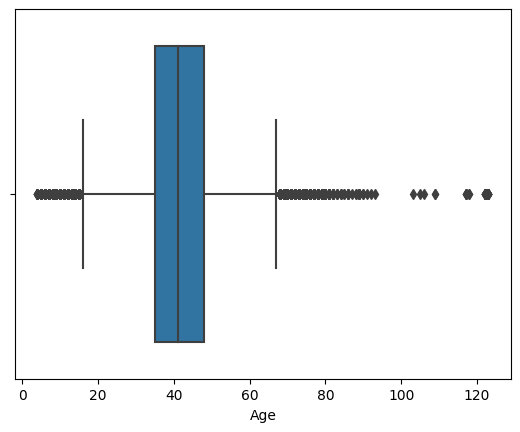

Number of outliers after removing them: 0


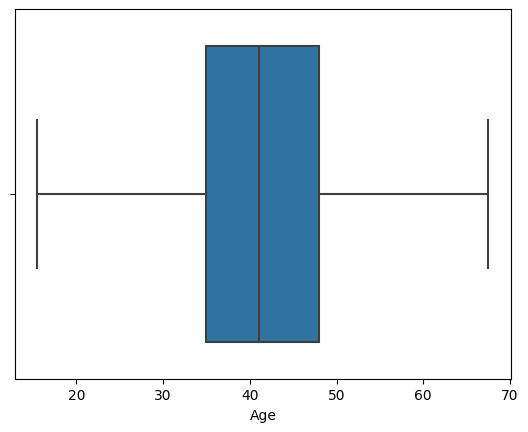

<Axes: >

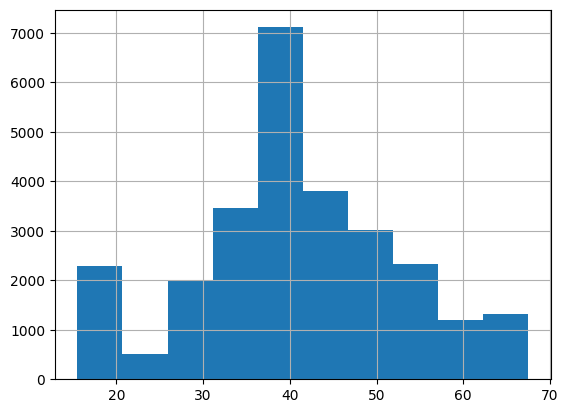

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Print number of outliers before removing them
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR
outliers_before = df[(df['Age'] < lower_cap) | (df['Age'] > upper_cap)].shape[0]

print("Number of outliers before removing them:", outliers_before)

sns.boxplot(x='Age', data=df)
plt.show()

df['Age'] = df['Age'].clip(lower=lower_cap, upper=upper_cap)

# Print number of outliers after removing them
outliers_after = df[(df['Age'] < lower_cap) | (df['Age'] > upper_cap)].shape[0]
print("Number of outliers after removing them:", outliers_after)

sns.boxplot(x='Age', data=df)
plt.show()
df['Age'].hist()

In [41]:
df['Age'].max()

67.5

Number of rows before outlier removal: 27045
Number of rows after outlier removal: 27045


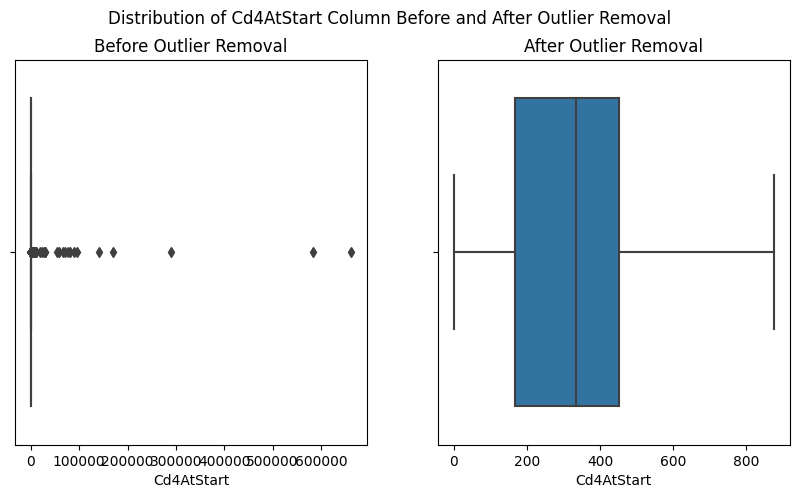

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert the 'Cd4AtStart' column to numeric
df['Cd4AtStart'] = pd.to_numeric(df['Cd4AtStart'], errors='coerce')

# Print the number of rows before outlier removal
print("Number of rows before outlier removal:", len(df))

# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Plot boxplot of the age column before outlier removal
sns.boxplot(x=df['Cd4AtStart'], ax=axs[0])
axs[0].set_title('Before Outlier Removal')

# Calculate the first and third quartiles of the age column
Q1 = df['Cd4AtStart'].quantile(0.25)
Q3 = df['Cd4AtStart'].quantile(0.75)

# Calculate the interquartile range of the age column
IQR = Q3 - Q1

# Define the lower and upper bounds of the "normal" range of the age column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outliers in the age column with the capped values
df['Cd4AtStart'] = np.where(df['Cd4AtStart'] < lower_bound, lower_bound, df['Cd4AtStart'])
df['Cd4AtStart'] = np.where(df['Cd4AtStart'] > upper_bound, upper_bound, df['Cd4AtStart'])

# Print the number of rows after outlier removal
print("Number of rows after outlier removal:", len(df))

# Plot boxplot of the age column after outlier removal
sns.boxplot(x=df['Cd4AtStart'], ax=axs[1])
axs[1].set_title('After Outlier Removal')

# Set the plot title
plt.suptitle('Distribution of Cd4AtStart Column Before and After Outlier Removal')

# Show the plot
plt.show()

Number of rows before outlier removal: 27045
Number of rows after outlier removal: 27045


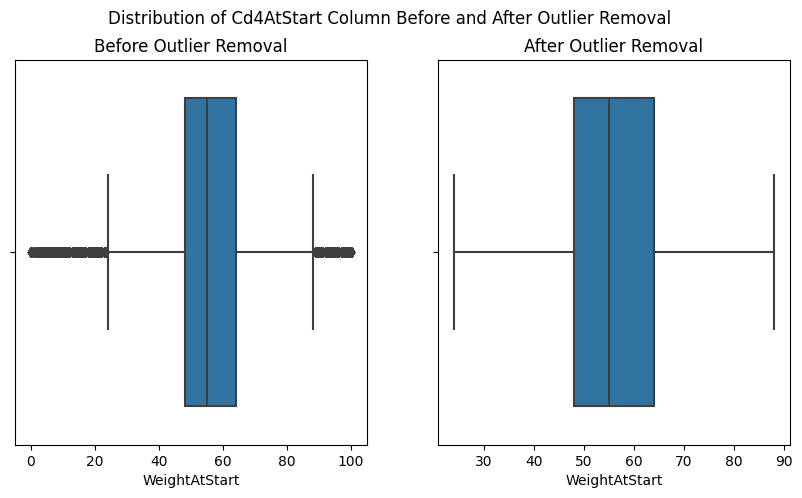

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Print the number of rows before outlier removal
print("Number of rows before outlier removal:", len(df))

# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Plot boxplot of the age column before outlier removal
sns.boxplot(x=df['WeightAtStart'], ax=axs[0])
axs[0].set_title('Before Outlier Removal')

# Calculate the first and third quartiles of the age column
Q1 = df['WeightAtStart'].quantile(0.25)
Q3 = df['WeightAtStart'].quantile(0.75)

# Calculate the interquartile range of the age column
IQR = Q3 - Q1

# Define the lower and upper bounds of the "normal" range of the age column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outliers in the age column with the capped values
df['WeightAtStart'] = np.where(df['WeightAtStart'] < lower_bound, lower_bound, df['WeightAtStart'])
df['WeightAtStart'] = np.where(df['WeightAtStart'] > upper_bound, upper_bound, df['WeightAtStart'])

# Print the number of rows after outlier removal
print("Number of rows after outlier removal:", len(df))

# Plot boxplot of the age column after outlier removal
sns.boxplot(x=df['WeightAtStart'], ax=axs[1])
axs[1].set_title('After Outlier Removal')

# Set the plot title
plt.suptitle('Distribution of Cd4AtStart Column Before and After Outlier Removal')

# Show the plot
plt.show()

Number of rows before outlier removal: 27045
Number of rows after outlier removal: 27045


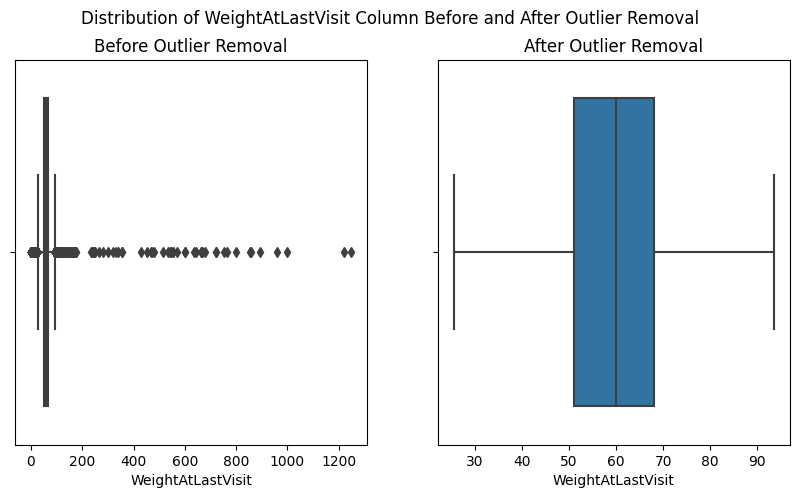

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Print the number of rows before outlier removal
print("Number of rows before outlier removal:", len(df))

# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Plot boxplot of the age column before outlier removal
sns.boxplot(x=df['WeightAtLastVisit'], ax=axs[0])
axs[0].set_title('Before Outlier Removal')

# Calculate the first and third quartiles of the age column
Q1 = df['WeightAtLastVisit'].quantile(0.25)
Q3 = df['WeightAtLastVisit'].quantile(0.75)

# Calculate the interquartile range of the age column
IQR = Q3 - Q1

# Define the lower and upper bounds of the "normal" range of the age column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outliers in the age column with the capped values
df['WeightAtLastVisit'] = np.where(df['WeightAtLastVisit'] < lower_bound, lower_bound, df['WeightAtLastVisit'])
df['WeightAtLastVisit'] = np.where(df['WeightAtLastVisit'] > upper_bound, upper_bound, df['WeightAtLastVisit'])

# Print the number of rows after outlier removal
print("Number of rows after outlier removal:", len(df))

# Plot boxplot of the age column after outlier removal
sns.boxplot(x=df['WeightAtLastVisit'], ax=axs[1])
axs[1].set_title('After Outlier Removal')

# Set the plot title
plt.suptitle('Distribution of WeightAtLastVisit Column Before and After Outlier Removal')

# Show the plot
plt.show()

Number of rows before outlier removal: 27045
Number of rows after outlier removal: 27045


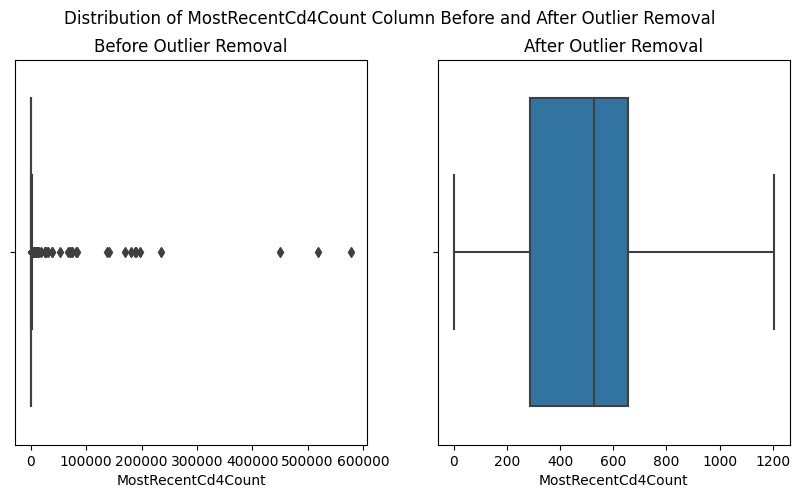

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Print the number of rows before outlier removal
print("Number of rows before outlier removal:", len(df))

# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Plot boxplot of the age column before outlier removal
sns.boxplot(x=df['MostRecentCd4Count'], ax=axs[0])
axs[0].set_title('Before Outlier Removal')

# Calculate the first and third quartiles of the age column
Q1 = df['MostRecentCd4Count'].quantile(0.25)
Q3 = df['MostRecentCd4Count'].quantile(0.75)

# Calculate the interquartile range of the age column
IQR = Q3 - Q1

# Define the lower and upper bounds of the "normal" range of the age column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outliers in the age column with the capped values
df['MostRecentCd4Count'] = np.where(df['MostRecentCd4Count'] < lower_bound, lower_bound, df['MostRecentCd4Count'])
df['MostRecentCd4Count'] = np.where(df['MostRecentCd4Count'] > upper_bound, upper_bound, df['MostRecentCd4Count'])

# Print the number of rows after outlier removal
print("Number of rows after outlier removal:", len(df))

# Plot boxplot of the age column after outlier removal
sns.boxplot(x=df['MostRecentCd4Count'], ax=axs[1])
axs[1].set_title('After Outlier Removal')

# Set the plot title
plt.suptitle('Distribution of MostRecentCd4Count Column Before and After Outlier Removal')

# Show the plot
plt.show()

Number of outliers before removing them: 2716


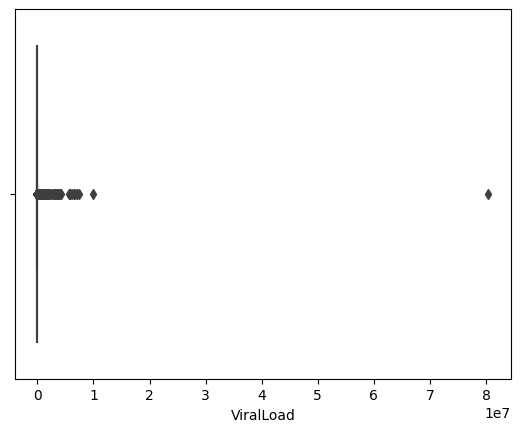

Number of outliers after removing them: 0


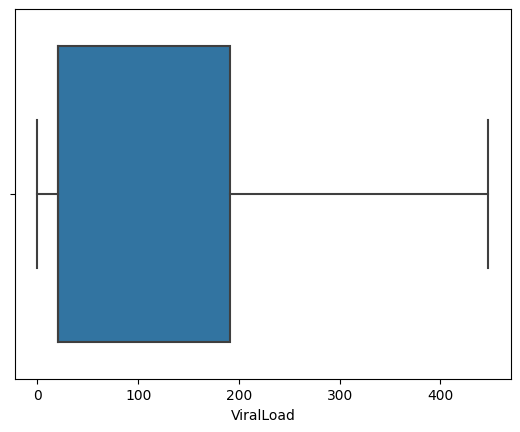

<Axes: >

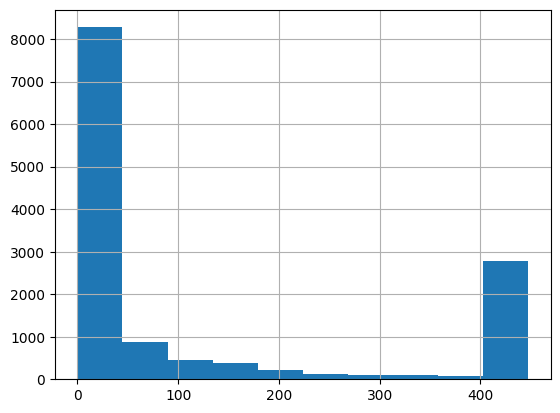

In [46]:
# Print number of outliers before removing them
Q1 = df['ViralLoad'].quantile(0.25)
Q3 = df['ViralLoad'].quantile(0.75)
IQR = Q3 - Q1
lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR
outliers_before = df[(df['ViralLoad'] < lower_cap) | (df['ViralLoad'] > upper_cap)].shape[0]
print("Number of outliers before removing them:", outliers_before)

sns.boxplot(x='ViralLoad', data=df)
plt.show()

df['ViralLoad'] = df['ViralLoad'].clip(lower=lower_cap, upper=upper_cap)

# Print number of outliers after removing them
outliers_after = df[(df['ViralLoad'] < lower_cap) | (df['ViralLoad'] > upper_cap)].shape[0]
print("Number of outliers after removing them:", outliers_after)

sns.boxplot(x='ViralLoad', data=df)
plt.show()
df['ViralLoad'].hist()

In [47]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd


# Select the column with missing values
column = df['ViralLoad']

# Create the imputer object
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer on the column
imputer.fit(column.values.reshape(-1, 1))

# Transform the column with imputed values
column_imputed = pd.DataFrame(imputer.transform(column.values.reshape(-1, 1)))

# Replace the missing values in the original DataFrame with the imputed values
df['ViralLoad'] = column_imputed.values

# Print the number of missing values before and after imputation
print('Missing values before imputation:', column.isnull().sum())
print('Missing values after imputation:', df['ViralLoad'].isnull().sum())

Missing values before imputation: 13659
Missing values after imputation: 0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'WeightAtStart'}>],
       [<Axes: title={'center': 'Cd4AtStart'}>,
        <Axes: title={'center': 'WeightAtLastVisit'}>],
       [<Axes: title={'center': 'MostRecentCd4Count'}>,
        <Axes: title={'center': 'ViralLoad'}>]], dtype=object)

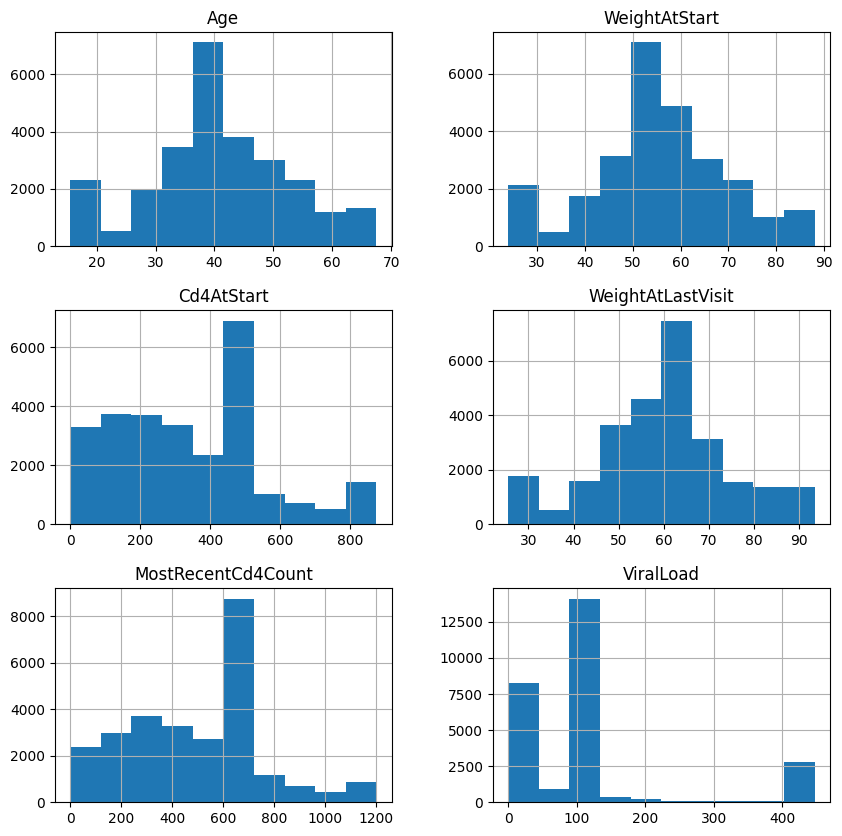

In [48]:
df.hist(figsize = (10,10))

In [49]:
df.describe()

,Age,WeightAtStart,Cd4AtStart,WeightAtLastVisit,MostRecentCd4Count,ViralLoad
count,27045.000000,27045.000000,27045.000000,27045.000000,27045.000000,27045.000000
mean,40.933463,55.484859,340.929083,59.425095,497.694936,130.442492
std,12.147354,14.491957,212.565276,15.054248,263.095625,121.432415
min,15.500000,24.000000,0.000000,25.500000,0.000000,0.000000
25%,35.000000,48.000000,169.000000,51.000000,288.000000,20.000000
50%,41.000000,55.000000,334.000000,60.000000,529.000000,130.442492
75%,48.000000,64.000000,451.511158,68.000000,654.213839,130.442492
max,67.500000,88.000000,875.277894,93.500000,1203.534598,447.500000


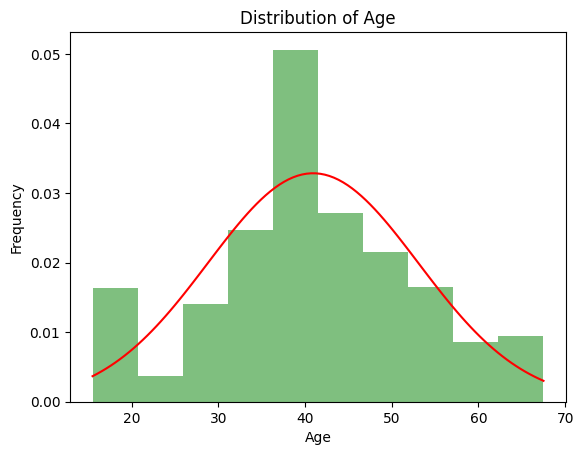

The 'Age' column is not normally distributed (p = 5.9559625266236546e-21)
Skewness of 'Age' column: -0.14153470567116425
Kurtosis of 'Age' column: 0.05813154280084021


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest, skew, kurtosis

# perform normality test on 'Age' column
stat, p = normaltest(df['Age'])

# calculate skewness and kurtosis of 'Age' column
sk = skew(df['Age'])
ku = kurtosis(df['Age'])

# plot histogram of 'Age' column
plt.hist(df['Age'], density=True, alpha=0.5, color='green')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

# add a normal distribution curve to the plot for comparison
mu, sigma = df['Age'].mean(), df['Age'].std()
x = np.linspace(df['Age'].min(), df['Age'].max(), 100)
y = np.exp(-(x-mu)**2 / (2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
plt.plot(x, y, color='red')

plt.show()

alpha = 0.05
if p < alpha:
    print("The 'Age' column is not normally distributed (p = {})".format(p))
else:
    print("The 'Age' column is normally distributed (p = {})".format(p))

print("Skewness of 'Age' column: {}".format(sk))
print("Kurtosis of 'Age' column: {}".format(ku))

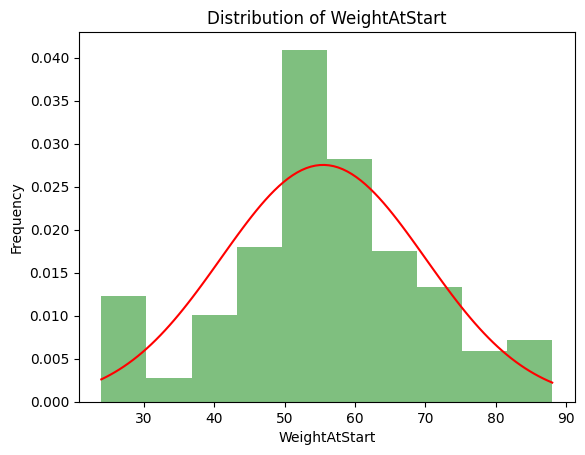

The 'WeightAtStart' column is not normally distributed (p = 1.5873944068978226e-34)
Skewness of 'WeightAtStart' column: -0.14153470567116425
Kurtosis of 'WeightAtStart' column: 0.05813154280084021


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import normaltest, skew, kurtosis

# perform normality test on 'Age' column
stat, p = normaltest(df['WeightAtStart'])

# plot histogram of 'Age' column
plt.hist(df['WeightAtStart'], density=True, alpha=0.5, color='green')
plt.title("Distribution of WeightAtStart")
plt.xlabel("WeightAtStart")
plt.ylabel("Frequency")

# add a normal distribution curve to the plot for comparison
mu, sigma = df['WeightAtStart'].mean(), df['WeightAtStart'].std()
x = np.linspace(df['WeightAtStart'].min(), df['WeightAtStart'].max(), 100)
y = np.exp(-(x-mu)**2 / (2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
plt.plot(x, y, color='red')

plt.show()

alpha = 0.05
if p < alpha:
    print("The 'WeightAtStart' column is not normally distributed (p = {})".format(p))
else:
    print("The 'WeightAtStart' column is normally distributed (p = {})".format(p))
    
print("Skewness of 'WeightAtStart' column: {}".format(sk))
print("Kurtosis of 'WeightAtStart' column: {}".format(ku))

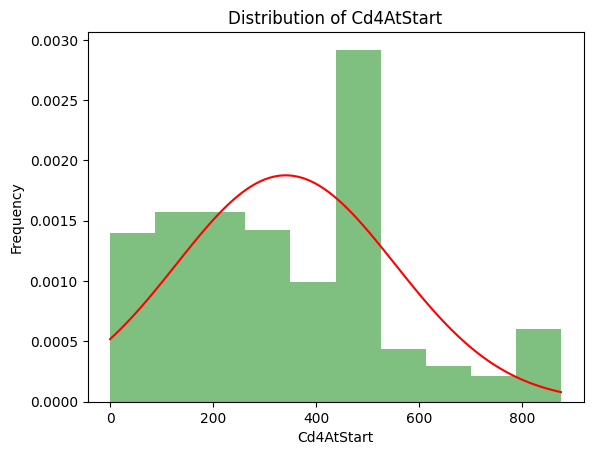

The 'Cd4AtStart' column is not normally distributed (p = 6.309904864858696e-289)
Skewness of 'Cd4AtStart' column: -0.14153470567116425
Kurtosis of 'Cd4AtStart' column: 0.05813154280084021


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import normaltest, skew, kurtosis

# perform normality test on 'Cd4AtStart' column
stat, p = normaltest(df['Cd4AtStart'])

# plot histogram of 'Cd4AtStart' column
plt.hist(df['Cd4AtStart'], density=True, alpha=0.5, color='green')
plt.title("Distribution of Cd4AtStart")
plt.xlabel("Cd4AtStart")
plt.ylabel("Frequency")

# add a normal distribution curve to the plot for comparison
mu, sigma = df['Cd4AtStart'].mean(), df['Cd4AtStart'].std()
x = np.linspace(df['Cd4AtStart'].min(), df['Cd4AtStart'].max(), 100)
y = np.exp(-(x-mu)**2 / (2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
plt.plot(x, y, color='red')

plt.show()

alpha = 0.05
if p < alpha:
    print("The 'Cd4AtStart' column is not normally distributed (p = {})".format(p))
else:
    print("The 'Cd4AtStart' column is normally distributed (p = {})".format(p))
    
print("Skewness of 'Cd4AtStart' column: {}".format(sk))
print("Kurtosis of 'Cd4AtStart' column: {}".format(ku))

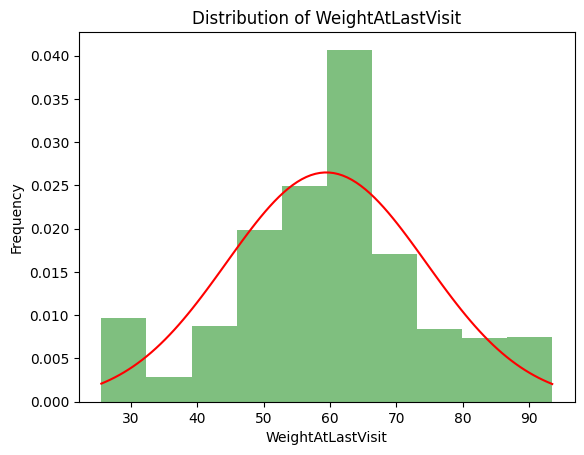

The 'WeightAtLastVisit' column is not normally distributed (p = 1.2208740834519429e-28)
Skewness of 'WeightAtLastVisit' column: -0.14153470567116425
Kurtosis of 'WeightAtLastVisit' column: 0.05813154280084021


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import normaltest, skew, kurtosis

# perform normality test on 'WeightAtLastVisit' column
stat, p = normaltest(df['WeightAtLastVisit'])

# plot histogram of 'WeightAtLastVisit' column
plt.hist(df['WeightAtLastVisit'], density=True, alpha=0.5, color='green')
plt.title("Distribution of WeightAtLastVisit")
plt.xlabel("WeightAtLastVisit")
plt.ylabel("Frequency")

# add a normal distribution curve to the plot for comparison
mu, sigma = df['WeightAtLastVisit'].mean(), df['WeightAtLastVisit'].std()
x = np.linspace(df['WeightAtLastVisit'].min(), df['WeightAtLastVisit'].max(), 100)
y = np.exp(-(x-mu)**2 / (2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
plt.plot(x, y, color='red')

plt.show()

alpha = 0.05
if p < alpha:
    print("The 'WeightAtLastVisit' column is not normally distributed (p = {})".format(p))
else:
    print("The 'WeightAtLastVisit' column is normally distributed (p = {})".format(p))
    
print("Skewness of 'WeightAtLastVisit' column: {}".format(sk))
print("Kurtosis of 'WeightAtLastVisit' column: {}".format(ku))

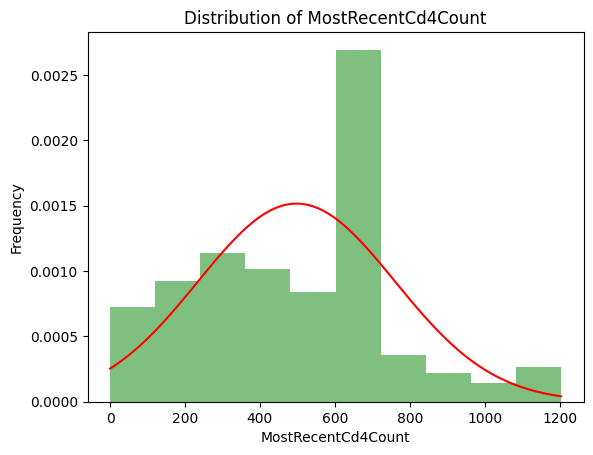

The 'MostRecentCd4Count' column is not normally distributed (p = 1.1178282575589637e-72)
Skewness of 'MostRecentCd4Count' column: -0.14153470567116425
Kurtosis of 'MostRecentCd4Count' column: 0.05813154280084021


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import normaltest, skew, kurtosis

# perform normality test on 'MostRecentCd4Count' column
stat, p = normaltest(df['MostRecentCd4Count'])

# plot histogram of 'MostRecentCd4Count' column
plt.hist(df['MostRecentCd4Count'], density=True, alpha=0.5, color='green')
plt.title("Distribution of MostRecentCd4Count")
plt.xlabel("MostRecentCd4Count")
plt.ylabel("Frequency")

# add a normal distribution curve to the plot for comparison
mu, sigma = df['MostRecentCd4Count'].mean(), df['MostRecentCd4Count'].std()
x = np.linspace(df['MostRecentCd4Count'].min(), df['MostRecentCd4Count'].max(), 100)
y = np.exp(-(x-mu)**2 / (2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
plt.plot(x, y, color='red')

plt.show()

alpha = 0.05
if p < alpha:
    print("The 'MostRecentCd4Count' column is not normally distributed (p = {})".format(p))
else:
    print("The 'MostRecentCd4Count' column is normally distributed (p = {})".format(p))
    
print("Skewness of 'MostRecentCd4Count' column: {}".format(sk))
print("Kurtosis of 'MostRecentCd4Count' column: {}".format(ku))

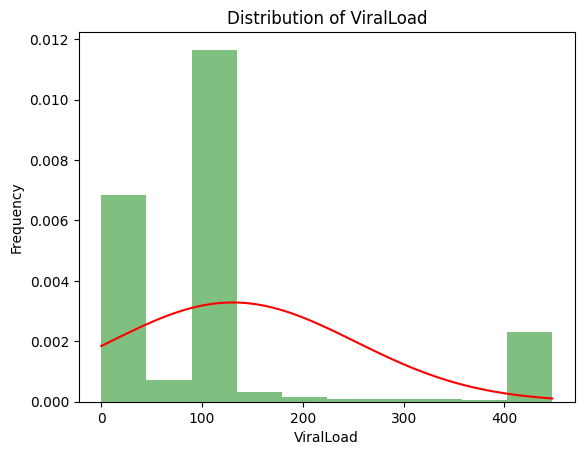

The 'ViralLoad' column is not normally distributed (p = 0.0)
Skewness of 'ViralLoad' column: -0.14153470567116425
Kurtosis of 'ViralLoad' column: 0.05813154280084021


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import normaltest, skew, kurtosis

# perform normality test on 'ViralLoad' column
stat, p = normaltest(df['ViralLoad'])

# plot histogram of 'ViralLoad' column
plt.hist(df['ViralLoad'], density=True, alpha=0.5, color='green')
plt.title("Distribution of ViralLoad")
plt.xlabel("ViralLoad")
plt.ylabel("Frequency")

# add a normal distribution curve to the plot for comparison
mu, sigma = df['ViralLoad'].mean(), df['ViralLoad'].std()
x = np.linspace(df['ViralLoad'].min(), df['ViralLoad'].max(), 100)
y = np.exp(-(x-mu)**2 / (2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
plt.plot(x, y, color='red')

plt.show()

alpha = 0.05
if p < alpha:
    print("The 'ViralLoad' column is not normally distributed (p = {})".format(p))
else:
    print("The 'ViralLoad' column is normally distributed (p = {})".format(p))
    
print("Skewness of 'ViralLoad' column: {}".format(sk))
print("Kurtosis of 'ViralLoad' column: {}".format(ku))

In [56]:
df

,Age,Sex,MaritalStatus,EducationLevel,Occupation,RegimenAtStart,WeightAtStart,Cd4AtStart,ClinicalStageAtLastVisit,TbStatusAtLAstVisit,ArvAdherenceLatestLevel,WeightAtLastVisit,OpportunisticInfectionPresentAtLastVisit,AnySideEffects,MostRecentCd4Count,ViralLoad
0,22.0,Female,Single,Tertiary,Student,TDF3TCEFV,54.0,451.511158,I,No sign,Good,59.0,No,No,654.213839,130.442492
1,36.0,Female,Married,Primary,Unemployed,TDF3TCEFV,40.0,451.511158,II,No sign,Good,50.0,No,No,654.213839,20.000000
2,67.5,Male,Married,Primary,Civil servant,AZT3TCNVP,78.0,20.000000,II,No sign,Good,85.0,No,No,416.000000,20.000000
3,60.0,Female,Married,Secondary,Self employed,TDF3TCEFV,41.0,58.000000,I,No sign,Good,47.0,No,No,185.000000,447.500000
4,38.0,Female,Single,Secondary,Self employed,TDF3TCEFV,58.0,394.000000,I,No sign,Good,70.0,No,No,657.000000,130.442492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27283,36.0,Male,Married,Tertiary,Civil servant,TDF3TCEFV,56.0,35.000000,I,No sign,Good,67.0,No,No,454.000000,20.000000
27284,36.0,Female,Single,Secondary,Business person,TDF3TCEFV,32.0,158.000000,I,No sign,Good,45.0,No,No,654.213839,130.442492
27285,40.0,Female,Married,Tertiary,Unemployed,TDF3TCEFV,55.0,301.000000,I,No sign,Good,60.0,No,No,463.000000,130.442492
27286,32.0,Female,Single,Secondary,Student,TDF3TCEFV,52.0,65.000000,II,No sign,Good,55.0,No,No,654.213839,130.442492


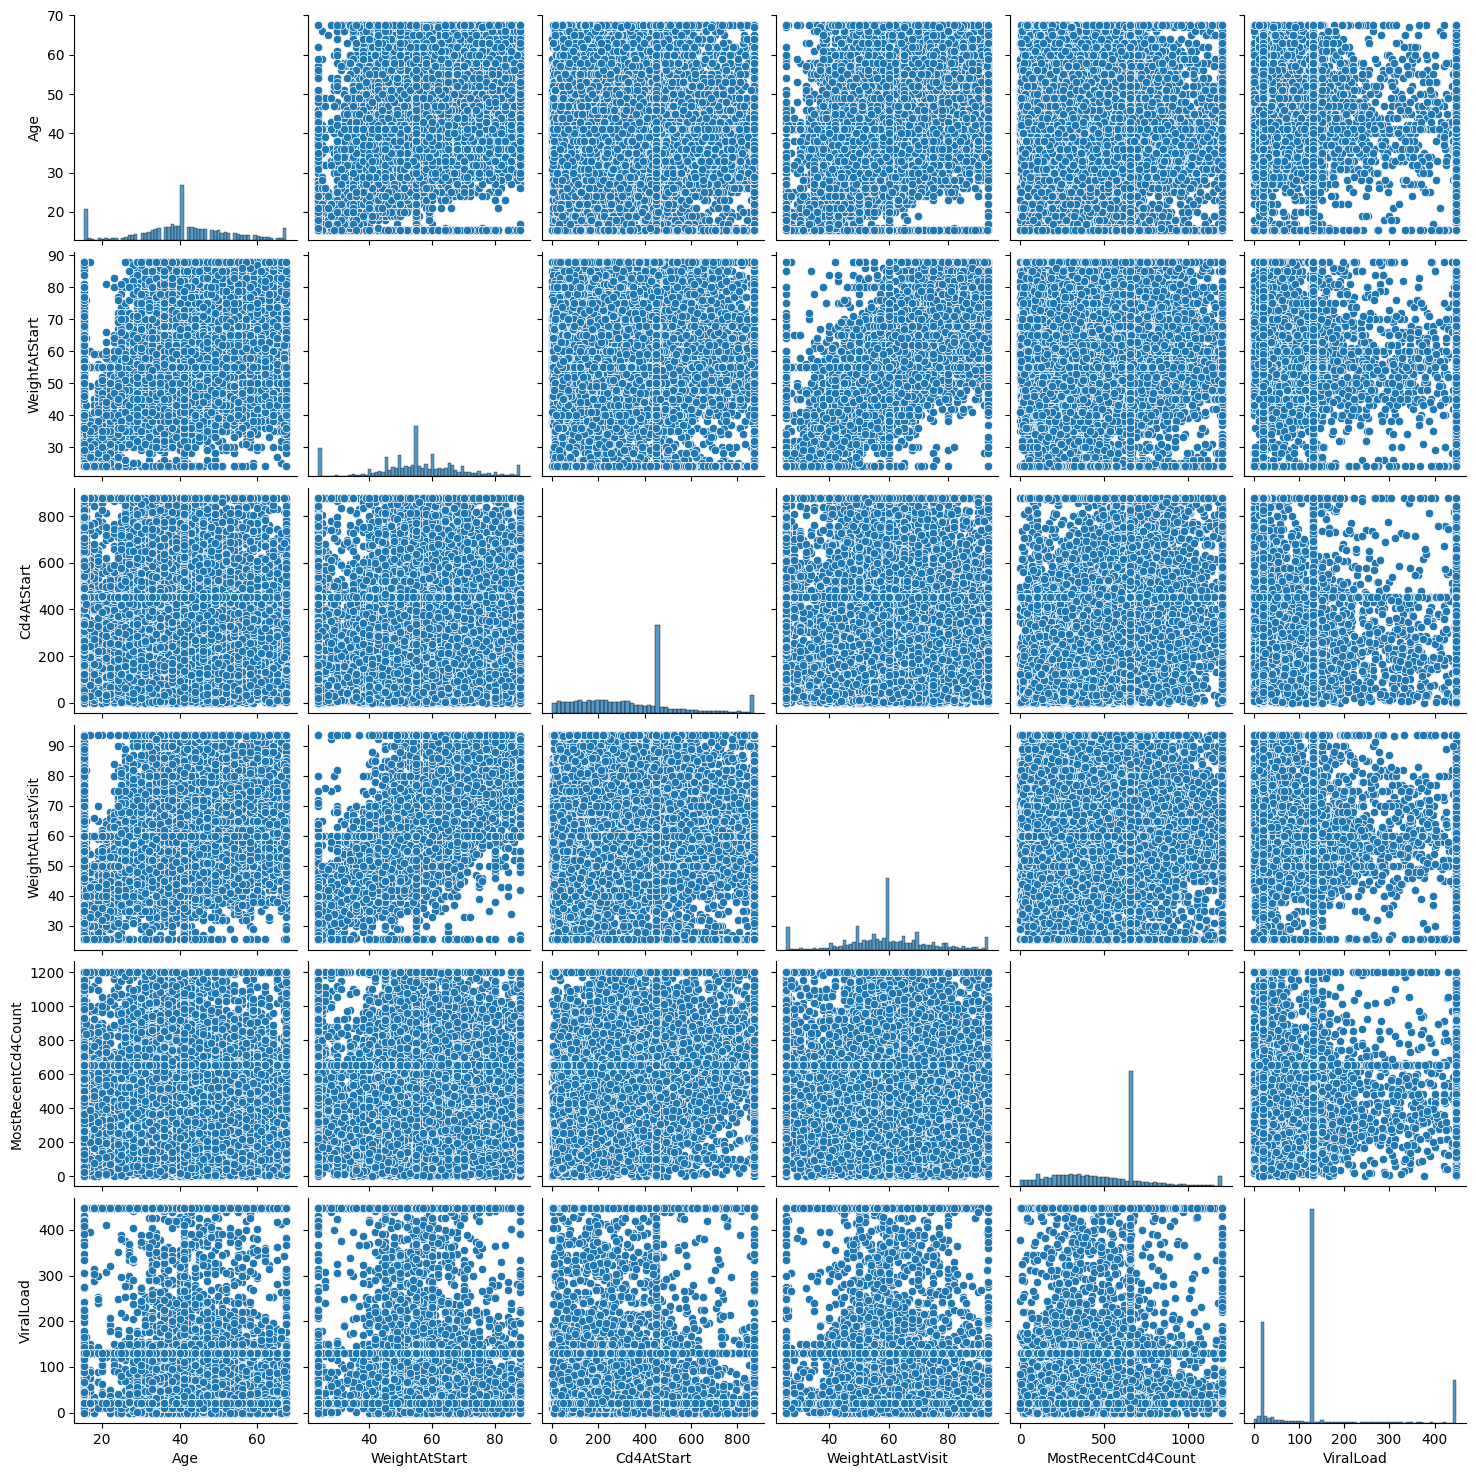

In [57]:
import seaborn as sns
import pandas as pd


# Create a pair plot using Seaborn
sns.pairplot(df)

# Display the plot
plt.show()


/tmp/ipykernel_3866883/831105033.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='kendall')


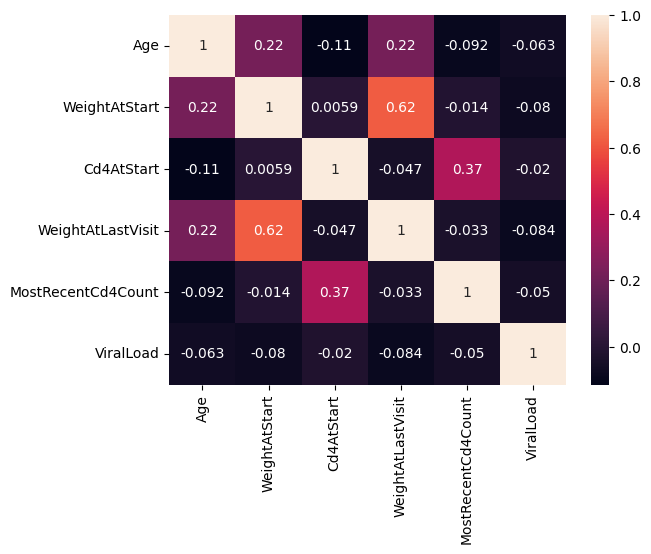

In [59]:
import seaborn as sns
import pandas as pd

# Calculate the Spearman's correlation matrix using pandas
corr_matrix = df.corr(method='kendall')

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True)

# Display the plot
plt.show()

In [60]:
from scipy.stats import chi2_contingency
import pandas as pd

# Specify the column names for the categorical columns and the outcome variable
cat_cols = ['Sex', 'MaritalStatus', 'EducationLevel', 'Occupation', 'RegimenAtStart', 'ClinicalStageAtLastVisit', 'TbStatusAtLAstVisit', 'AnySideEffects']
outcome_col = 'OpportunisticInfectionPresentAtLastVisit'

# Loop over each categorical column and perform the chi-square test with respect to the outcome variable
for col in cat_cols:
    # Create a contingency table using pandas
    contingency_table = pd.crosstab(df[col], df[outcome_col])

    # Perform the chi-square test using SciPy
    chi2, pval, dof, expected = chi2_contingency(contingency_table)

    # Print the results of the chi-square test
    
    print('Chi-square statistic = {:.3f}'.format(chi2))
    print('P-value = {}'.format(pval))
    print('Degrees of freedom = {}'.format(dof))

    # Interpret the results
    if pval < 0.05:
        print('There is a significant association between {} and {}'.format(col, outcome_col))
    else:
        print('There is no significant association between {} and {}'.format(col, outcome_col))

Chi-square statistic = 2.672
P-value = 0.10211522856953958
Degrees of freedom = 1
There is no significant association between Sex and OpportunisticInfectionPresentAtLastVisit
Chi-square statistic = 36.296
P-value = 8.288199849627636e-07
Degrees of freedom = 5
There is a significant association between MaritalStatus and OpportunisticInfectionPresentAtLastVisit
Chi-square statistic = 38.631
P-value = 8.301338976494468e-08
Degrees of freedom = 4
There is a significant association between EducationLevel and OpportunisticInfectionPresentAtLastVisit
Chi-square statistic = 36.156
P-value = 2.68736096295424e-07
Degrees of freedom = 4
There is a significant association between Occupation and OpportunisticInfectionPresentAtLastVisit
Chi-square statistic = 36.094
P-value = 0.021337556466625687
Degrees of freedom = 21
There is a significant association between RegimenAtStart and OpportunisticInfectionPresentAtLastVisit
Chi-square statistic = 406.271
P-value = 9.701531967547993e-88
Degrees of freed

In [61]:
from scipy.stats import chi2_contingency
import pandas as pd

# Specify the column names for the categorical columns and the outcome variable
cat_cols = ['Sex', 'MaritalStatus', 'EducationLevel', 'Occupation', 'RegimenAtStart', 'ClinicalStageAtLastVisit', 'TbStatusAtLAstVisit', 'AnySideEffects']
outcome_col = 'ArvAdherenceLatestLevel'

# Loop over each categorical column and perform the chi-square test with respect to the outcome variable
for col in cat_cols:
    # Create a contingency table using pandas
    contingency_table = pd.crosstab(df[col], df[outcome_col])

    # Perform the chi-square test using SciPy
    chi2, pval, dof, expected = chi2_contingency(contingency_table)

    # Print the results of the chi-square test
    
    print('Chi-square statistic = {:.3f}'.format(chi2))
    print('P-value = {}'.format(pval))
    print('Degrees of freedom = {}'.format(dof))

    # Interpret the results
    if pval < 0.05:
        print('There is a significant association between {} and {}'.format(col, outcome_col))
    else:
        print('There is no significant association between {} and {}'.format(col, outcome_col))

Chi-square statistic = 1.968
P-value = 0.37377588315168586
Degrees of freedom = 2
There is no significant association between Sex and ArvAdherenceLatestLevel
Chi-square statistic = 18.170
P-value = 0.05216984048380457
Degrees of freedom = 10
There is no significant association between MaritalStatus and ArvAdherenceLatestLevel
Chi-square statistic = 47.598
P-value = 1.1791466403057309e-07
Degrees of freedom = 8
There is a significant association between EducationLevel and ArvAdherenceLatestLevel
Chi-square statistic = 48.415
P-value = 8.230326999388659e-08
Degrees of freedom = 8
There is a significant association between Occupation and ArvAdherenceLatestLevel
Chi-square statistic = 117.352
P-value = 4.743468015595472e-09
Degrees of freedom = 42
There is a significant association between RegimenAtStart and ArvAdherenceLatestLevel
Chi-square statistic = 140.541
P-value = 7.703649440760664e-28
Degrees of freedom = 6
There is a significant association between ClinicalStageAtLastVisit and Ar

In [62]:
from scipy.stats import mannwhitneyu

# Specify the continuous columns and the categorical dependent variable
cont_cols = ['Age', 'WeightAtStart', 'Cd4AtStart', 'WeightAtLastVisit']
dep_var = 'OpportunisticInfectionPresentAtLastVisit'

# Loop over each continuous column and perform the Mann-Whitney U test with respect to the dependent variable
for col in cont_cols:
    # Split the data based on the two levels of the dependent variable
    group1 = df[df[dep_var] == 'Yes'][col]
    group2 = df[df[dep_var] == 'No'][col]

    # Perform the Mann-Whitney U test using SciPy
    stat, pval = mannwhitneyu(group1, group2, alternative='two-sided')

    # Print the results of the Mann-Whitney U test
    print('Mann-Whitney U test between {} and {}:\n'.format(col, dep_var))
    print('Test statistic = {:.3f}'.format(stat))
    print('P-value = {}'.format(pval))

    # Interpret the results
    alpha = 0.05
    if pval < alpha:
        print('There is a significant difference between {} and {}'.format(col, dep_var))
        print('Reject the null hypothesis at the {} level of significance'.format(alpha))
    else:
        print('There is no significant difference between {} and {}'.format(col, dep_var))
        print('Fail to reject the null hypothesis at the {} level of significance'.format(alpha))

Mann-Whitney U test between Age and OpportunisticInfectionPresentAtLastVisit:

Test statistic = 35732717.000
P-value = 0.0025086545096555273
There is a significant difference between Age and OpportunisticInfectionPresentAtLastVisit
Reject the null hypothesis at the 0.05 level of significance
Mann-Whitney U test between WeightAtStart and OpportunisticInfectionPresentAtLastVisit:

Test statistic = 31881107.500
P-value = 1.4627555052426607e-11
There is a significant difference between WeightAtStart and OpportunisticInfectionPresentAtLastVisit
Reject the null hypothesis at the 0.05 level of significance
Mann-Whitney U test between Cd4AtStart and OpportunisticInfectionPresentAtLastVisit:

Test statistic = 30587540.500
P-value = 8.508678663447676e-24
There is a significant difference between Cd4AtStart and OpportunisticInfectionPresentAtLastVisit
Reject the null hypothesis at the 0.05 level of significance
Mann-Whitney U test between WeightAtLastVisit and OpportunisticInfectionPresentAtLastV

In [63]:
from scipy.stats import mannwhitneyu

# Specify the continuous columns and the categorical dependent variable
cont_cols = ['Age', 'WeightAtStart', 'Cd4AtStart', 'WeightAtLastVisit']
dep_var = 'ArvAdherenceLatestLevel'

# Loop over each continuous column and perform the Mann-Whitney U test with respect to the dependent variable
for col in cont_cols:
    # Split the data based on the two levels of the dependent variable
    group1 = df[df[dep_var] == 'Good'][col]
    group2 = df[df[dep_var] == 'Fair'][col]
    group3 = df[df[dep_var] == 'Poor'][col]

    # Perform the Mann-Whitney U test using SciPy
    stat, pval = mannwhitneyu(group1, group2, alternative='two-sided')

    # Print the results of the Mann-Whitney U test
    print('Mann-Whitney U test between {} and {}:\n'.format(col, dep_var))
    print('Test statistic = {:.3f}'.format(stat))
    print('P-value = {}'.format(pval))

    # Interpret the results
    alpha = 0.05
    if pval < alpha:
        print('There is a significant difference between {} and {}'.format(col, dep_var))
        print('Reject the null hypothesis at the {} level of significance'.format(alpha))
    else:
        print('There is no significant difference between {} and {}'.format(col, dep_var))
        print('Fail to reject the null hypothesis at the {} level of significance'.format(alpha))

Mann-Whitney U test between Age and ArvAdherenceLatestLevel:

Test statistic = 20517892.500
P-value = 0.08007678895437863
There is no significant difference between Age and ArvAdherenceLatestLevel
Fail to reject the null hypothesis at the 0.05 level of significance
Mann-Whitney U test between WeightAtStart and ArvAdherenceLatestLevel:

Test statistic = 20521494.500
P-value = 0.08225716446958545
There is no significant difference between WeightAtStart and ArvAdherenceLatestLevel
Fail to reject the null hypothesis at the 0.05 level of significance
Mann-Whitney U test between Cd4AtStart and ArvAdherenceLatestLevel:

Test statistic = 20989554.000
P-value = 0.8493865305938219
There is no significant difference between Cd4AtStart and ArvAdherenceLatestLevel
Fail to reject the null hypothesis at the 0.05 level of significance
Mann-Whitney U test between WeightAtLastVisit and ArvAdherenceLatestLevel:

Test statistic = 20417032.000
P-value = 0.03710785832074461
There is a significant difference

In [64]:
from scipy.stats import kruskal
import pandas as pd


# perform the Kruskal-Wallis test for outcome variable a
groups_a = [df[df[k]==cat]['MostRecentCd4Count'] for k in ['Sex', 'MaritalStatus', 'EducationLevel', 'Occupation', 'RegimenAtStart', 'ClinicalStageAtLastVisit', 'TbStatusAtLAstVisit', 'AnySideEffects'] for cat in df[k].unique()]
statistic_a, p_value_a = kruskal(*groups_a)

# perform the Kruskal-Wallis test for outcome variable b
groups_b = [df[df[k]==cat]['ArvAdherenceLatestLevel'] for k in ['Sex', 'MaritalStatus', 'EducationLevel', 'Occupation', 'RegimenAtStart', 'ClinicalStageAtLastVisit', 'TbStatusAtLAstVisit', 'AnySideEffects'] for cat in df[k].unique()]
statistic_b, p_value_b = kruskal(*groups_b)

# print the results for variable a
print("Two-way Kruskal-Wallis test results for variable a:")
print("Test statistic: {:.3f}".format(statistic_a))
print("p-value: {:.3g}".format(p_value_a))
if p_value_a < 0.05:
    print("Reject null hypothesis: There is a significant difference between at least one pair of groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between any pair of groups.")

# print the results for variable b
print("\nTwo-way Kruskal-Wallis test results for variable b:")
print("Test statistic: {:.3f}".format(statistic_b))
print("p-value: {:.3g}".format(p_value_b))
if p_value_b < 0.05:
    print("Reject null hypothesis: There is a significant difference between at least one pair of groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between any pair of groups.")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


Two-way Kruskal-Wallis test results for variable a:
Test statistic: 1021.497
p-value: 2.57e-181
Reject null hypothesis: There is a significant difference between at least one pair of groups.

Two-way Kruskal-Wallis test results for variable b:
Test statistic: 137.574
p-value: 4.12e-10
Reject null hypothesis: There is a significant difference between at least one pair of groups.


In [65]:
import scipy.stats as stats
import pandas as pd

outcome = df['MostRecentCd4Count']
independent_var1 = df['Sex']
independent_var2 = df['MaritalStatus']
data = pd.DataFrame({"outcome": outcome, "independent_var1": independent_var1, "independent_var2": independent_var2})

# Perform Kruskal-Wallis test
kw_results = stats.kruskal(*[group["outcome"].values for name, group in data.groupby(["independent_var1", "independent_var2"])])
print(kw_results)


KruskalResult(statistic=261.93798066699816, pvalue=8.797429553569616e-50)


In [66]:
import scipy.stats as stats
import pandas as pd

outcome = df['MostRecentCd4Count']
independent_var1 = df['Sex']
independent_var2 = df['MaritalStatus']
independent_var3 = df['EducationLevel']
independent_var4 = df['Occupation']
independent_var5 = df['RegimenAtStart']
independent_var6 = df['ClinicalStageAtLastVisit']
independent_var7 = df['TbStatusAtLAstVisit']
independent_var8 = df['AnySideEffects']

# Group data by each independent variable and apply Kruskal-Wallis test
for i, col in enumerate([independent_var1, independent_var2, independent_var3, independent_var4, independent_var5, independent_var6, independent_var7, independent_var8], start=1):
    groups = [group for name, group in outcome.groupby(col)]
    kw_results = stats.kruskal(*groups)
    if kw_results[1] < 0.05:
        print(f"Independent variable {i}: Reject null hypothesis (p-value = {kw_results[1]})")
    else:
        print(f"Independent variable {i}: Fail to reject null hypothesis (p-value = {kw_results[1]})")

Independent variable 1: Reject null hypothesis (p-value = 3.6462083600739354e-23)
Independent variable 2: Reject null hypothesis (p-value = 3.216229350287343e-15)
Independent variable 3: Reject null hypothesis (p-value = 1.4392378018501816e-11)
Independent variable 4: Reject null hypothesis (p-value = 6.450115346477187e-58)
Independent variable 5: Reject null hypothesis (p-value = 2.567270338603802e-16)
Independent variable 6: Reject null hypothesis (p-value = 3.3248928934187194e-61)
Independent variable 7: Reject null hypothesis (p-value = 4.570259296341515e-16)
Independent variable 8: Reject null hypothesis (p-value = 1.606772086539784e-08)


In [67]:
import scipy.stats as stats
import pandas as pd

outcome = df['ViralLoad']
independent_var1 = df['Sex']
independent_var2 = df['MaritalStatus']
independent_var3 = df['EducationLevel']
independent_var4 = df['Occupation']
independent_var5 = df['RegimenAtStart']
independent_var6 = df['ClinicalStageAtLastVisit']
independent_var7 = df['TbStatusAtLAstVisit']
independent_var8 = df['AnySideEffects']

# Group data by each independent variable and apply Kruskal-Wallis test
for i, col in enumerate([independent_var1, independent_var2, independent_var3, independent_var4, independent_var5, independent_var6, independent_var7, independent_var8], start=1):
    groups = [group for name, group in outcome.groupby(col)]
    kw_results = stats.kruskal(*groups)
    if kw_results[1] < 0.05:
        print(f"Independent variable {i}: Reject null hypothesis (p-value = {kw_results[1]})")
    else:
        print(f"Independent variable {i}: Fail to reject null hypothesis (p-value = {kw_results[1]})")


Independent variable 1: Reject null hypothesis (p-value = 9.090238046059814e-13)
Independent variable 2: Reject null hypothesis (p-value = 1.937062549198964e-22)
Independent variable 3: Reject null hypothesis (p-value = 5.407182600589141e-17)
Independent variable 4: Reject null hypothesis (p-value = 1.23415758310594e-41)
Independent variable 5: Reject null hypothesis (p-value = 4.282095751766802e-21)
Independent variable 6: Reject null hypothesis (p-value = 6.243853147678423e-16)
Independent variable 7: Reject null hypothesis (p-value = 1.4579912011842146e-06)
Independent variable 8: Fail to reject null hypothesis (p-value = 0.06104999188024212)


In [68]:
# use the replace() method to convert 'male' to 0 and 'female' to 1
df['Sex'] = df['Sex'].replace({'Male': 0, 'Female': 1})
df['EducationLevel'] = df['EducationLevel'].replace({'No Education': 0, 'Primary': 1, 'Secondary': 2, 'Tertiary':3, 'Others':4})
df['MaritalStatus'] = df['MaritalStatus'].replace({'Single': 0, 'Married': 1, 'Widowed': 2, 'Seperated':3, 'Divorced':4, 'Cohabiting':5})
df['Occupation'] = df['Occupation'].replace({'Student': 0, 'Unemployed': 1, 'Civil servant': 2, 'Self employed':3, 'Business person':4})
df['RegimenAtStart'] = df['RegimenAtStart'].replace({'TDF3TCEFV': 0, 'AZT3TCNVP': 1, 'TDFFTCNVP': 2, 'TDF3TCNVP':3, 'TDFFTCEFV':4, 'AZT3TCEFV': 5, 'TDFFTCLPVr': 6, 'ABC3TCNVP': 7, 'ABC3TCEFV':8, 'TRVEFV':9, 'AZT3TCLPVr': 10, 'TDF3TCLPVr': 11, 'AZT3TCABC': 12, 'TDF3TCATVr':13, 'AZT3TCTDF':14, 'AZT3TCATVr': 15, 'ABC3TCLPVr': 16, 'TDFFTCATVr':17, 'ddi3TCNVP':18,'d4T3TCNVP': 19, 'ABC3TCddi': 20, 'd4T3TCLPVr':21})
df['AnySideEffects'] = df['AnySideEffects'].replace({'No': 0, 'Yes': 1})
df['OpportunisticInfectionPresentAtLastVisit'] = df['OpportunisticInfectionPresentAtLastVisit'].replace({'No': 0, 'Yes': 1})
df['TbStatusAtLAstVisit'] = df['TbStatusAtLAstVisit'].replace({'No sign': 0, 'IPT': 1, 'TB Treatment': 2, 'Presumptive TB':3, 'Confirmed TB':4})
df['ClinicalStageAtLastVisit'] = df['ClinicalStageAtLastVisit'].replace({'I': 0, 'II': 1, 'III': 2, 'IV': 3})
df['ArvAdherenceLatestLevel'] = df['ArvAdherenceLatestLevel'].replace({'Poor': 0, 'Fair': 1, 'Good': 2})
df

,Age,Sex,MaritalStatus,EducationLevel,Occupation,RegimenAtStart,WeightAtStart,Cd4AtStart,ClinicalStageAtLastVisit,TbStatusAtLAstVisit,ArvAdherenceLatestLevel,WeightAtLastVisit,OpportunisticInfectionPresentAtLastVisit,AnySideEffects,MostRecentCd4Count,ViralLoad
0,22.0,1,0,3,0,0,54.0,451.511158,0,0,2,59.0,0,0,654.213839,130.442492
1,36.0,1,1,1,1,0,40.0,451.511158,1,0,2,50.0,0,0,654.213839,20.000000
2,67.5,0,1,1,2,1,78.0,20.000000,1,0,2,85.0,0,0,416.000000,20.000000
3,60.0,1,1,2,3,0,41.0,58.000000,0,0,2,47.0,0,0,185.000000,447.500000
4,38.0,1,0,2,3,0,58.0,394.000000,0,0,2,70.0,0,0,657.000000,130.442492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27283,36.0,0,1,3,2,0,56.0,35.000000,0,0,2,67.0,0,0,454.000000,20.000000
27284,36.0,1,0,2,4,0,32.0,158.000000,0,0,2,45.0,0,0,654.213839,130.442492
27285,40.0,1,1,3,1,0,55.0,301.000000,0,0,2,60.0,0,0,463.000000,130.442492
27286,32.0,1,0,2,0,0,52.0,65.000000,1,0,2,55.0,0,0,654.213839,130.442492


In [69]:
df.isnull().sum()

Age                                         0
Sex                                         0
MaritalStatus                               0
EducationLevel                              0
Occupation                                  0
RegimenAtStart                              0
WeightAtStart                               0
Cd4AtStart                                  0
ClinicalStageAtLastVisit                    0
TbStatusAtLAstVisit                         0
ArvAdherenceLatestLevel                     0
WeightAtLastVisit                           0
OpportunisticInfectionPresentAtLastVisit    0
AnySideEffects                              0
MostRecentCd4Count                          0
ViralLoad                                   0
dtype: int64

In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, FunctionTransformer


# Define the columns you want to transform
cols_to_transform = ['Age', 'WeightAtStart', 'Cd4AtStart', 'WeightAtLastVisit', 'MostRecentCd4Count', 'ViralLoad']

# Log transformation
transformer = FunctionTransformer(func=np.log1p, validate=True)
df[cols_to_transform] = transformer.transform(df[cols_to_transform])

# Scaling
scaler = StandardScaler()
df[cols_to_transform] = scaler.fit_transform(df[cols_to_transform])

# Check for null values
print(df.isnull().sum())

# Save the updated file to local machine
df.to_csv("my_transformed_dataset.csv", index=False)


Age                                         0
Sex                                         0
MaritalStatus                               0
EducationLevel                              0
Occupation                                  0
RegimenAtStart                              0
WeightAtStart                               0
Cd4AtStart                                  0
ClinicalStageAtLastVisit                    0
TbStatusAtLAstVisit                         0
ArvAdherenceLatestLevel                     0
WeightAtLastVisit                           0
OpportunisticInfectionPresentAtLastVisit    0
AnySideEffects                              0
MostRecentCd4Count                          0
ViralLoad                                   0
dtype: int64


/home/students/gboppana/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [71]:
df = pd.read_csv('my_transformed_dataset.csv')
df

,Age,Sex,MaritalStatus,EducationLevel,Occupation,RegimenAtStart,WeightAtStart,Cd4AtStart,ClinicalStageAtLastVisit,TbStatusAtLAstVisit,ArvAdherenceLatestLevel,WeightAtLastVisit,OpportunisticInfectionPresentAtLastVisit,AnySideEffects,MostRecentCd4Count,ViralLoad
0,-1.626309,1,0,3,0,0,0.040412,0.610620,0,0,2,0.102187,0,0,0.600117,0.427804
1,-0.220541,1,1,1,1,0,-0.966853,0.610620,1,0,2,-0.477957,0,0,0.600117,-1.271929
2,1.600644,0,1,1,2,1,1.282052,-2.614833,1,0,2,1.387289,0,0,0.056441,-1.271929
3,1.257765,1,1,2,3,0,-0.884226,-1.529612,0,0,2,-0.694369,0,0,-0.914914,1.565261
4,-0.064880,1,0,2,3,0,0.281133,0.467824,0,0,2,0.703093,0,0,0.605223,0.427804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27040,-0.220541,0,1,3,2,0,0.162884,-2.048597,0,0,2,0.548981,0,0,0.161370,-1.271929
27041,-0.220541,1,0,2,4,0,-1.711137,-0.488145,0,0,2,-0.846294,0,0,0.600117,0.427804
27042,0.082994,1,1,3,1,0,0.102195,0.185798,0,0,2,0.161191,0,0,0.184936,0.427804
27043,-0.558838,1,0,2,0,0,-0.086597,-1.411829,1,0,2,-0.144097,0,0,0.600117,0.427804


In [72]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = df.drop(["ArvAdherenceLatestLevel"], axis=1)
y = df["ArvAdherenceLatestLevel"]
X_smote, y_smote = smote.fit_resample(X, y)

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report

# Split your data into training and testing sets for each target variable
X_train, X_test, y1_train, y1_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Create a logistic regression object for each target variable
logreg1 = LogisticRegression()

# Train the models using the training sets
logreg1.fit(X_train, y1_train)

# Predict on the test set for each target variable
y1_pred = logreg1.predict(X_test)

# Print the classification report for y1
print(classification_report(y1_test, y1_pred))
print("ROC-AUC score (y1):", roc_auc_score(y1_test, logreg1.predict_proba(X_test), multi_class='ovr'))


              precision    recall  f1-score   support

           0       0.45      0.58      0.50      4935
           1       0.43      0.33      0.37      4853
           2       0.47      0.44      0.45      4845

    accuracy                           0.45     14633
   macro avg       0.45      0.45      0.44     14633
weighted avg       0.45      0.45      0.44     14633

ROC-AUC score (y1): 0.6278618908113834


In [74]:
df['OpportunisticInfectionPresentAtLastVisit'].value_counts()

0    24189
1     2856
Name: OpportunisticInfectionPresentAtLastVisit, dtype: int64

In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = df.drop(["OpportunisticInfectionPresentAtLastVisit"], axis=1)
y = df["OpportunisticInfectionPresentAtLastVisit"]
X_smote, y_smote = smote.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.58      0.74      0.65      4860
           1       0.64      0.45      0.53      4816

    accuracy                           0.60      9676
   macro avg       0.61      0.60      0.59      9676
weighted avg       0.61      0.60      0.59      9676



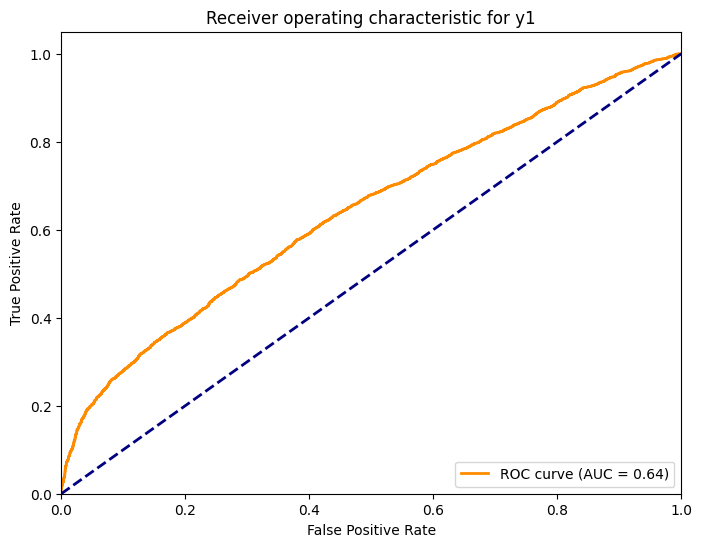

ROC-AUC score (y1): 0.639993745129404


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Split your dataset into features (X) and target variables (y1, y2, y3, y4)
#X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit", "Sex",  "Age"], axis=1)
#y1 = df["OpportunisticInfectionPresentAtLastVisit"]

# Split your data into training and testing sets for each target variable
X_train, X_test, y1_train, y1_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Create a logistic regression object for each target variable
logreg1 = LogisticRegression()

# Train the models using the training sets
logreg1.fit(X_train, y1_train)

# Predict on the test set for each target variable
y1_pred = logreg1.predict(X_test)
y1_proba = logreg1.predict_proba(X_test)

# Print the classification report for y1
print(classification_report(y1_test, y1_pred))

# Compute the ROC curve and ROC AUC for y1
fpr, tpr, thresholds = roc_curve(y1_test, y1_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for y1
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for y1')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score for y1
print("ROC-AUC score (y1):", roc_auc_score(y1_test, y1_proba[:, 1], multi_class='ovr'))


Classification Report (y1) for training set:
               precision    recall  f1-score   support

           0       0.58      0.74      0.65     19329
           1       0.64      0.46      0.54     19373

    accuracy                           0.60     38702
   macro avg       0.61      0.60      0.59     38702
weighted avg       0.61      0.60      0.59     38702

              precision    recall  f1-score   support

           0       0.58      0.74      0.65      4860
           1       0.64      0.45      0.53      4816

    accuracy                           0.60      9676
   macro avg       0.61      0.60      0.59      9676
weighted avg       0.61      0.60      0.59      9676



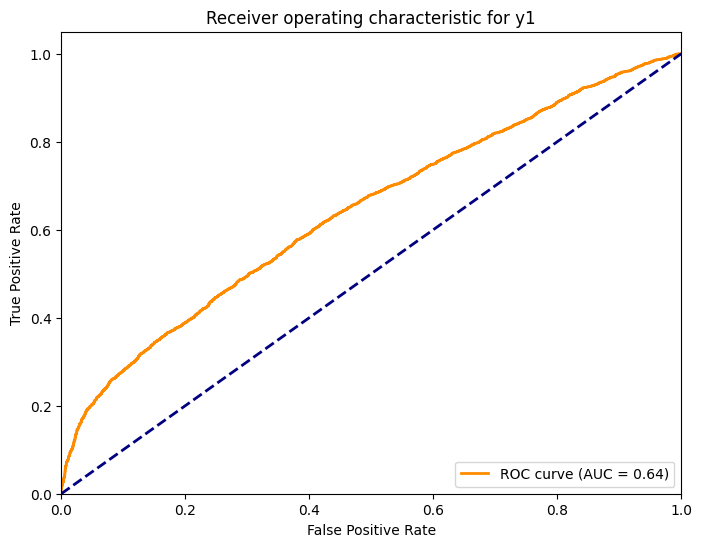

ROC-AUC score (y1): 0.639993745129404
Testing accuracy (y1): 0.5988011575031005
Training accuracy (y1): 0.6013384321223709


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Split your dataset into features (X) and target variables (y1, y2, y3, y4)
#X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit", "Sex",  "Age"], axis=1)
#y1 = df["OpportunisticInfectionPresentAtLastVisit"]

# Split your data into training and testing sets for each target variable
X_train, X_test, y1_train, y1_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Create a logistic regression object for each target variable
logreg1 = LogisticRegression()

# Train the models using the training sets
logreg1.fit(X_train, y1_train)


# Predict on the training set for each target variable
y1_train_pred = logreg1.predict(X_train)
y1_train_proba = logreg1.predict_proba(X_train)

# Print the classification report for y1 on training set
print("Classification Report (y1) for training set:\n", classification_report(y1_train, y1_train_pred))

# Predict on the test set for each target variable
y1_pred = logreg1.predict(X_test)
y1_proba = logreg1.predict_proba(X_test)

# Print the classification report for y1
print(classification_report(y1_test, y1_pred))

# Compute the ROC curve and ROC AUC for y1
fpr, tpr, thresholds = roc_curve(y1_test, y1_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for y1
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for y1')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score and training accuracy for y1
print("ROC-AUC score (y1):", roc_auc_score(y1_test, y1_proba[:, 1], multi_class='ovr'))
print("Testing accuracy (y1):", logreg1.score(X_test, y1_test))
print("Training accuracy (y1):", logreg1.score(X_train, y1_train))


Classification Report (y1) for training set:
               precision    recall  f1-score   support

           0       0.58      0.74      0.65     19329
           1       0.64      0.46      0.54     19373

    accuracy                           0.60     38702
   macro avg       0.61      0.60      0.59     38702
weighted avg       0.61      0.60      0.59     38702

              precision    recall  f1-score   support

           0       0.58      0.74      0.65      4860
           1       0.64      0.45      0.53      4816

    accuracy                           0.60      9676
   macro avg       0.61      0.60      0.59      9676
weighted avg       0.61      0.60      0.59      9676



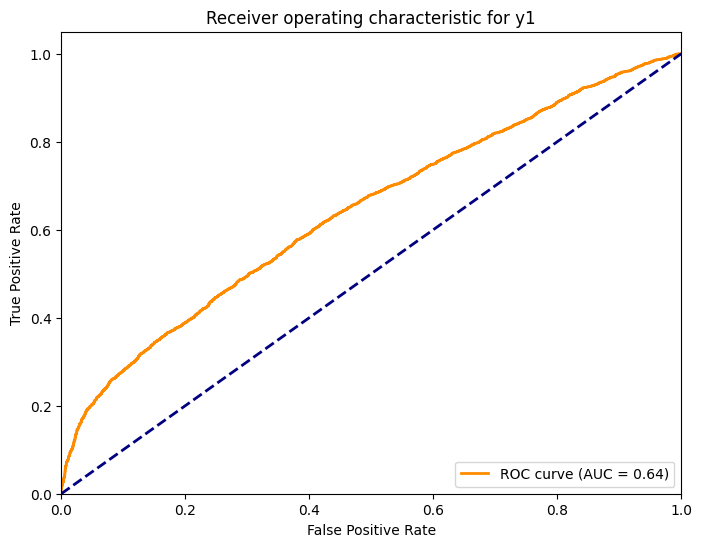

ROC-AUC score (y1): 0.639993745129404
Testing accuracy (y1): 0.5988011575031005
Training accuracy (y1): 0.6013384321223709
Most contributing features for y1:
                     Feature  Coefficient
12            AnySideEffects     2.051587
9        TbStatusAtLAstVisit     0.365897
11         WeightAtLastVisit    -0.180710
10   ArvAdherenceLatestLevel    -0.170268
0                        Age     0.164857
1                        Sex    -0.164721
7                 Cd4AtStart    -0.156744
2              MaritalStatus    -0.152125
8   ClinicalStageAtLastVisit     0.107685
5             RegimenAtStart    -0.059031
4                 Occupation    -0.057828
14                 ViralLoad    -0.049250
3             EducationLevel    -0.030661
6              WeightAtStart    -0.005505
13        MostRecentCd4Count     0.002681


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Split your dataset into features (X) and target variables (y1, y2, y3, y4)
#X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit", "Sex",  "Age"], axis=1)
#y1 = df["OpportunisticInfectionPresentAtLastVisit"]

# Split your data into training and testing sets for each target variable
X_train, X_test, y1_train, y1_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Create a logistic regression object for each target variable
logreg1 = LogisticRegression()

# Train the models using the training sets
logreg1.fit(X_train, y1_train)


# Predict on the training set for each target variable
y1_train_pred = logreg1.predict(X_train)
y1_train_proba = logreg1.predict_proba(X_train)

# Print the classification report for y1 on training set
print("Classification Report (y1) for training set:\n", classification_report(y1_train, y1_train_pred))

# Predict on the test set for each target variable
y1_pred = logreg1.predict(X_test)
y1_proba = logreg1.predict_proba(X_test)

# Print the classification report for y1
print(classification_report(y1_test, y1_pred))

# Compute the ROC curve and ROC AUC for y1
fpr, tpr, thresholds = roc_curve(y1_test, y1_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for y1
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for y1')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score and training accuracy for y1
print("ROC-AUC score (y1):", roc_auc_score(y1_test, y1_proba[:, 1], multi_class='ovr'))
print("Testing accuracy (y1):", logreg1.score(X_test, y1_test))
print("Training accuracy (y1):", logreg1.score(X_train, y1_train))

# Get the most contributing features for y1
coef = logreg1.coef_[0]
features = X_train.columns.tolist()
features_coef = pd.DataFrame({'Feature': features, 'Coefficient': coef})
features_coef_sorted = features_coef.reindex(features_coef.Coefficient.abs().sort_values(ascending=False).index)
print("Most contributing features for y1:")
print(features_coef_sorted)

In [79]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit"], axis=1)
y = df["MostRecentCd4Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model object
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predict the output using the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the model
mse = mean_squared_error(y_test, y_pred)

# Calculate the R2 score of the model
r2 = r2_score(y_test, y_pred)

# Calculate the MAPE of the model
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100

# Print the MSE, R2 score, and MAPE of the model
print('Mean Squared Error:', mse)
print('R2 Score:', r2)
print('MAPE:', mape)

Mean Squared Error: 0.7281708838162586
R2 Score: 0.2427156470028594
MAPE: 262.4646642024509


In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Split data into training and testing sets
X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit"], axis=1)
y = df["MostRecentCd4Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Regressor model object
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict the output using the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the model
mse = mean_squared_error(y_test, y_pred)

# Calculate the R2 score of the model
r2 = r2_score(y_test, y_pred)

# Calculate the MAPE of the model
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100

# Print the MSE, R2 score, and MAPE of the model
print('Mean Squared Error:', mse)
print('R2 Score:', r2)
print('MAPE:', mape)


Mean Squared Error: 0.755798124031742
R2 Score: 0.21398382429933294
MAPE: 304.71218169256076


In [81]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Split data into training and testing sets
X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit"], axis=1)
y = df["MostRecentCd4Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Gradient Boosting Regressor model object
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict the output using the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the model
mse = mean_squared_error(y_test, y_pred)

# Calculate the R2 score of the model
r2 = r2_score(y_test, y_pred)

# Calculate the MAPE of the model
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100

# Print the MSE, R2 score, and MAPE of the model
print('Mean Squared Error:', mse)
print('R2 Score:', r2)
print('MAPE:', mape)

Mean Squared Error: 0.705814190338902
R2 Score: 0.2659661978439274
MAPE: 255.99228613832543


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import pandas as pd

# Split data into training and testing sets
X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit"], axis=1)
y = df["MostRecentCd4Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the search space for hyperparameters
search_space = [
    Integer(10, 500, name='n_estimators'),
    Real(0.01, 1.0, name='max_features'),
    Integer(1, 10, name='max_depth'),
    Real(0.01, 0.5, name='min_samples_split')
]

# Define the objective function to minimize
@use_named_args(search_space)
def objective_function(**params):
    model = RandomForestRegressor(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return -1.0 * scores.mean()

# Run Bayesian optimization to minimize the objective function
result = gp_minimize(objective_function, search_space, n_calls=50)

# Print the best set of hyperparameters found
print("Best score: %.4f" % result.fun)
print("Best parameters: n_estimators=%d, max_features=%.4f, max_depth=%d, min_samples_split=%.4f" % tuple(result.x))

# Train the model using the best hyperparameters
best_params = {'n_estimators': result.x[0], 'max_features': result.x[1], 'max_depth': result.x[2], 'min_samples_split': result.x[3]}
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE), R-squared, and MAPE of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the evaluation metrics of the model
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Mean Absolute Percentage Error:', mape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import pandas as pd
import numpy as np
import time

# Split data into training and testing sets
X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit"], axis=1)
y = df["MostRecentCd4Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the search space for hyperparameters
search_space = [
    Integer(10, 500, name='n_estimators'),
    Real(0.01, 1.0, name='max_features'),
    Integer(1, 10, name='max_depth'),
    Real(0.01, 0.5, name='min_samples_split')
]

# Define the objective function to minimize
@use_named_args(search_space)
def objective_function(**params):
    model = RandomForestRegressor(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return -1.0 * scores.mean()

# Run Bayesian optimization to minimize the objective function
n_calls = 50
start_time = time.time()
result = gp_minimize(objective_function, search_space, n_calls=n_calls)

# Print the best set of hyperparameters found
print("Best score: %.4f" % result.fun)
print("Best parameters: n_estimators=%d, max_features=%.4f, max_depth=%d, min_samples_split=%.4f" % tuple(result.x))

# Train the model using the best hyperparameters
best_params = {'n_estimators': result.x[0], 'max_features': result.x[1], 'max_depth': result.x[2], 'min_samples_split': result.x[3]}
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE), R-squared, and MAPE of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the evaluation metrics of the model
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Mean Absolute Percentage Error:', mape)

# Calculate the total running time and time per call
total_time = time.time() - start_time
time_per_call = total_time / n_calls
print('Total running time:', total_time, 'seconds')
print('Time per call:', time_per_call, 'seconds')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import pandas as pd

# Split data into training and testing sets
X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit"], axis=1)
y = df["MostRecentCd4Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the search space for hyperparameters
search_space = [
    Integer(10, 500, name='n_estimators'),
    Real(0.01, 1.0, name='max_features'),
    Integer(1, 10, name='max_depth'),
    Real(0.01, 0.5, name='min_samples_split')
]

# Define the objective function to minimize
@use_named_args(search_space)
def objective_function(**params):
    model = RandomForestRegressor(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return -1.0 * scores.mean()

# Run Bayesian optimization to minimize the objective function
result = gp_minimize(objective_function, search_space, n_calls=50)

# Print the best set of hyperparameters found
print("Best score: %.4f" % result.fun)
print("Best parameters: n_estimators=%d, max_features=%.4f, max_depth=%d, min_samples_split=%.4f" % tuple(result.x))

# Train the model using the best hyperparameters
best_params = {'n_estimators': result.x[0], 'max_features': result.x[1], 'max_depth': result.x[2], 'min_samples_split': result.x[3]}
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the model
mse = mean_squared_error(y_test, y_pred)

# Print the MSE of the model
print('Mean Squared Error:', mse)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Split your dataset into features (X) and target variables (y1, y2, y3, y4)
#X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit", "Sex",  "Age"], axis=1)
#y1 = df["OpportunisticInfectionPresentAtLastVisit"]

# Split your data into training and testing sets for each target variable
X_train, X_test, y1_train, y1_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Create a random forest object for each target variable
rf1 = RandomForestClassifier()

# Train the models using the training sets
rf1.fit(X_train, y1_train)

# Predict on the test set for each target variable
y1_pred = rf1.predict(X_test)
y1_proba = rf1.predict_proba(X_test)

# Print the classification report for y1
print(classification_report(y1_test, y1_pred))

# Compute the ROC curve and ROC AUC for y1
fpr, tpr, thresholds = roc_curve(y1_test, y1_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for y1
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for y1')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score for y1
print("ROC-AUC score (y1):", roc_auc_score(y1_test, y1_proba[:, 1], multi_class='ovr'))

In [ ]:
df['ArvAdherenceLatestLevel'].value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = df.drop(["ArvAdherenceLatestLevel"], axis=1)
y = df["ArvAdherenceLatestLevel"]
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Split your dataset into features (X) and target variables (y1, y2, y3, y4)
#X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit", "Sex",  "Age"], axis=1)
#y1 = df["OpportunisticInfectionPresentAtLastVisit"]

# Split your data into training and testing sets for each target variable
X_train, X_test, y1_train, y1_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


# Create a logistic regression object for each target variable
logreg1 = LogisticRegression(multi_class='ovr')

# Train the models using the training sets
logreg1.fit(X_train, y1_train)

# Predict on the test set for each target variable
y1_pred = logreg1.predict(X_test)
y1_proba = logreg1.predict_proba(X_test)

# Print the classification report for y1
print(classification_report(y1_test, y1_pred))

# Assume y is the true labels and y_prob is the predicted probabilities for each class
# y and y_prob should be numpy arrays or pandas series
n_classes = len(np.unique(y))
y_bin = label_binarize(y1_test, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y1_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y1_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure()
lw = 2
colors = ['blue', 'green', 'orange']  # choose colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score for y1
print("ROC-AUC score (y1):", roc_auc_score(y_bin, y1_proba, multi_class='ovr'))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import numpy as np

# Split your dataset into features (X) and target variables (y1, y2, y3, y4)
X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit_No", "OpportunisticInfectionPresentAtLastVisit_Yes", "Sex_Male", "Sex_Female", "WeightAtStart", "Cd4AtStart"], axis=1)
y1 = df["ArvAdherenceLatestLevel"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

param_space = {'penalty': Categorical(['l2']),
               'C': Real(0.001, 10),
               'solver': Categorical(['lbfgs', 'saga']),
               'multi_class': Categorical(['ovr', 'multinomial'])}

# Define logistic regression model
lr = LogisticRegression()

# Perform bayesian optimization search with 5-fold cross-validation
bayes_search = BayesSearchCV(lr, param_space, cv=10, n_jobs=-1, verbose=1)
bayes_search.fit(X_train, y_train)

# Calculate the average of all cross-validation scores
cv_scores = bayes_search.cv_results_['mean_test_score']
print("Average cross-validation score: ", np.mean(cv_scores))

# Print the best hyperparameters and best cross-validation score
print("Best hyperparameters: ", bayes_search.best_params_)
print("Best cross-validation score: ", bayes_search.best_score_)

# Make predictions on test set using best model
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance of best model on test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", test_accuracy)
print("Precision (y1):", precision_score(y_test, y_pred, average='macro'))
print("Recall (y1):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (y1):", f1_score(y_test, y_pred, average='macro'))
print("ROC-AUC score (y1):", roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr'))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import numpy as np

# Split your dataset into features (X) and target variables (y1, y2, y3, y4)
X = df[['MaritalStatus', 'EducationLevel', 'ClinicalStageAtLastVisit',
       'Sex_Male', 'TbStatusAtLAstVisit_Confirmed TB',
       'TbStatusAtLAstVisit_IPT', 'TbStatusAtLAstVisit_No sign',
       'TbStatusAtLAstVisit_Presumptive TB',
       'TbStatusAtLAstVisit_TB Treatment', 'AnySideEffects_Yes']]

y1 = df["ArvAdherenceLatestLevel"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

param_space = {'penalty': Categorical(['l2']),
               'C': Real(0.001, 10),
               'solver': Categorical(['lbfgs', 'saga']),
               'multi_class': Categorical(['ovr', 'multinomial'])}

# Define logistic regression model
lr = LogisticRegression()

# Perform bayesian optimization search with 5-fold cross-validation
bayes_search = BayesSearchCV(lr, param_space, cv=10, n_jobs=-1, verbose=1)
bayes_search.fit(X_train, y_train)

# Calculate the average of all cross-validation scores
cv_scores = bayes_search.cv_results_['mean_test_score']
print("Average cross-validation score: ", np.mean(cv_scores))

# Print the best hyperparameters and best cross-validation score
print("Best hyperparameters: ", bayes_search.best_params_)
print("Best cross-validation score: ", bayes_search.best_score_)

# Make predictions on test set using best model
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance of best model on test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", test_accuracy)
print("Precision (y1):", precision_score(y_test, y_pred, average='macro'))
print("Recall (y1):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (y1):", f1_score(y_test, y_pred, average='macro'))
print("ROC-AUC score (y1):", roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr'))

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split your dataset into features (X) and target variable (y)
X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit_No", "OpportunisticInfectionPresentAtLastVisit_Yes", "Sex_Male", "Sex_Female", "WeightAtStart", "Cd4AtStart"], axis=1)
y = df[["ArvAdherenceLatestLevel"]]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier object
dtc = DecisionTreeClassifier()

# Train the model using the training set
dtc.fit(X_train, y_train)

# Predict on the test set
y_pred = dtc.predict(X_test).reshape(-1, 1)

# Evaluate the model using various metrics for each target variable
print("Accuracy (ArvAdherenceLatestLevel):", accuracy_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0]))
print("Precision (ArvAdherenceLatestLevel):", precision_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0], average='weighted'))
print("Recall (ArvAdherenceLatestLevel):", recall_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0], average='weighted'))
print("F1-Score (ArvAdherenceLatestLevel):", f1_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0], average='weighted'))

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split your dataset into features (X) and target variable (y)
X = df[['MaritalStatus', 'EducationLevel', 'ClinicalStageAtLastVisit',
       'Sex_Male', 'TbStatusAtLAstVisit_Confirmed TB',
       'TbStatusAtLAstVisit_IPT', 'TbStatusAtLAstVisit_No sign',
       'TbStatusAtLAstVisit_Presumptive TB',
       'TbStatusAtLAstVisit_TB Treatment', 'AnySideEffects_Yes']]
y = df[["ArvAdherenceLatestLevel"]]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier object
dtc = DecisionTreeClassifier()

# Train the model using the training set
dtc.fit(X_train, y_train)

# Predict on the test set
y_pred = dtc.predict(X_test).reshape(-1, 1)

# Evaluate the model using various metrics for each target variable
print("Accuracy (ArvAdherenceLatestLevel):", accuracy_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0]))
print("Precision (ArvAdherenceLatestLevel):", precision_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0], average='weighted'))
print("Recall (ArvAdherenceLatestLevel):", recall_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0], average='weighted'))
print("F1-Score (ArvAdherenceLatestLevel):", f1_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0], average='weighted'))

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split your dataset into features (X) and target variable (y)
X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit_No", "OpportunisticInfectionPresentAtLastVisit_Yes", "Sex_Male", "Sex_Female", "WeightAtStart", "Cd4AtStart"], axis=1)
y = df[["ArvAdherenceLatestLevel"]]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier object
dtc = RandomForestClassifier()

# Train the model using the training set
dtc.fit(X_train, y_train)

# Predict on the test set
y_pred = dtc.predict(X_test).reshape(-1, 1)

# Evaluate the model using various metrics for each target variable
print("Accuracy (ArvAdherenceLatestLevel):", accuracy_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0]))
print("Precision (ArvAdherenceLatestLevel):", precision_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0], average='weighted'))
print("Recall (ArvAdherenceLatestLevel):", recall_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0], average='weighted'))
print("F1-Score (ArvAdherenceLatestLevel):", f1_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0], average='weighted'))

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split your dataset into features (X) and target variable (y)
X = df.drop(["ArvAdherenceLatestLevel", "ViralLoad", "MostRecentCd4Count", "OpportunisticInfectionPresentAtLastVisit_No", "OpportunisticInfectionPresentAtLastVisit_Yes", "Sex_Male", "Sex_Female", "WeightAtStart", "Cd4AtStart"], axis=1)
y = df[["ArvAdherenceLatestLevel"]]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier object
dtc = GradientBoostingClassifier()

# Train the model using the training set
dtc.fit(X_train, y_train)

# Predict on the test set
y_pred = dtc.predict(X_test).reshape(-1, 1)

# Evaluate the model using various metrics for each target variable
print("Accuracy (ArvAdherenceLatestLevel):", accuracy_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0]))
print("Precision (ArvAdherenceLatestLevel):", precision_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0], average='weighted'))
print("Recall (ArvAdherenceLatestLevel):", recall_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0], average='weighted'))
print("F1-Score (ArvAdherenceLatestLevel):", f1_score(y_test["ArvAdherenceLatestLevel"], y_pred[:, 0], average='weighted'))